## Social Media Usage and Emotional Wellbeing

Social media has become deeply embedded into society and our personal lives, impacting our everyday activities and emotional wellbeing. This analysis explores a dataset that has captured social media engagement and the users' prevailing emotional state. The objective of this research is to understand the relationship between social media habits and emotional well-being.

This notebook will include the following sections:
- Data Cleaning / Preparation
- Exploratory Data Analysis
- Model Selection
- Model Analysis

## Section 1: Data Cleaning / Preparation
- Load libraries and data
- Understand the data with descriptive statistics
- Locate and address any missing values
- 

In [547]:
# Import libraries for data analysis, visualization, math calculation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [548]:
social_df = pd.read_csv("https://raw.githubusercontent.com/gurlv/SocialMediaDataset/main/SocialMediaDataset.csv")

In [549]:
print(social_df.head())

   User_ID  Age      Gender   Platform  Daily_Usage_Minutes  Posts_Per_Day  \
0        1   25      Female  Instagram                  120              3   
1        2   30        Male    Twitter                   90              5   
2        3   22  Non-binary   Facebook                   60              2   
3        4   28      Female  Instagram                  200              8   
4        5   33        Male   LinkedIn                   45              1   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                      45                         10                     12   
1                      20                         25                     30   
2                      15                          5                     20   
3                     100                         30                     50   
4                       5                          2                     10   

  Dominant_Emotion  
0        Happiness  
1            A

In [550]:
print(social_df.count())

User_ID                      1000
Age                          1000
Gender                       1000
Platform                     1000
Daily_Usage_Minutes          1000
Posts_Per_Day                1000
Likes_Received_Per_Day       1000
Comments_Received_Per_Day    1000
Messages_Sent_Per_Day        1000
Dominant_Emotion             1000
dtype: int64


In [551]:
print(social_df.columns)

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Minutes',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')


In [552]:
print(social_df.dtypes)

User_ID                       int64
Age                           int64
Gender                       object
Platform                     object
Daily_Usage_Minutes           int64
Posts_Per_Day                 int64
Likes_Received_Per_Day        int64
Comments_Received_Per_Day     int64
Messages_Sent_Per_Day         int64
Dominant_Emotion             object
dtype: object


In [553]:
# Identify missing values
missing_values = social_df.isnull().sum()

# Print the missing values count for each column
print("Missing Values:")
print(missing_values)

Missing Values:
User_ID                      0
Age                          0
Gender                       0
Platform                     0
Daily_Usage_Minutes          0
Posts_Per_Day                0
Likes_Received_Per_Day       0
Comments_Received_Per_Day    0
Messages_Sent_Per_Day        0
Dominant_Emotion             0
dtype: int64


In [554]:
# Get a list of the categorical columns and all unique values
emotion_list = social_df['Dominant_Emotion'].unique()
print("Emotions:", emotion_list)

gender_list = social_df['Gender'].unique()
print("Gender:", gender_list)

platform_list = social_df['Platform'].unique()
print("Platform:", platform_list)

Emotions: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']
Gender: ['Female' 'Male' 'Non-binary']
Platform: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


In [555]:
# Group the data by 'Platform' column
grouped_data = social_df.groupby('Platform')['Gender']

# Calculate descriptive statistics for each group
group_stats = grouped_data.describe()
print(group_stats)

          count unique         top freq
Platform                               
Facebook    190      3  Non-binary  140
Instagram   250      3      Female  160
LinkedIn    120      3        Male   50
Snapchat     80      2  Non-binary   50
Telegram     80      2        Male   60
Twitter     200      3        Male  110
Whatsapp     80      2      Female   60


In [556]:
# Group the data by 'Platform' column
grouped_data = social_df.groupby('Platform')
# Calculate descriptive statistics for each group
group_stats = grouped_data.describe()
print(group_stats)

          User_ID                                                       \
            count        mean         std   min     25%    50%     75%   
Platform                                                                 
Facebook    190.0  496.684211  289.397852   3.0  245.00  500.0  743.00   
Instagram   250.0  492.040000  289.064198   1.0  239.75  498.0  738.50   
LinkedIn    120.0  479.500000  288.860264   5.0  230.00  480.0  728.00   
Snapchat     80.0  529.000000  289.371208  58.0  280.50  529.0  777.50   
Telegram     80.0  528.000000  289.371208  57.0  279.50  528.0  776.50   
Twitter     200.0  494.300000  289.347229   2.0  241.75  499.0  739.25   
Whatsapp     80.0  527.000000  289.371208  56.0  278.50  527.0  775.50   

                     Age             ... Comments_Received_Per_Day        \
              max  count       mean  ...                       75%   max   
Platform                             ...                                   
Facebook    997.0  190.0  26.26

In [557]:
print(social_df.dtypes)

User_ID                       int64
Age                           int64
Gender                       object
Platform                     object
Daily_Usage_Minutes           int64
Posts_Per_Day                 int64
Likes_Received_Per_Day        int64
Comments_Received_Per_Day     int64
Messages_Sent_Per_Day         int64
Dominant_Emotion             object
dtype: object


## Section 2: Exploratory Data Analysis

### Dominant Emotion Per Platform

C:\Users\infin\anaconda3\envs\Pandas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


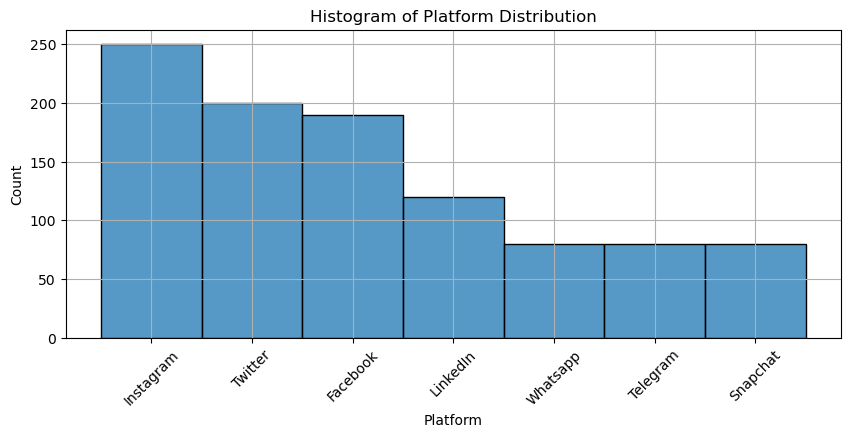


           count unique        top freq
Platform                              
Facebook    190      4    Neutral   70
Instagram   250      5  Happiness  170
LinkedIn    120      4    Boredom   70
Snapchat     80      4    Sadness   30
Telegram     80      5    Neutral   30
Twitter     200      6      Anger   80
Whatsapp     80      4      Anger   30

Contingency Table:

Platform          Facebook  Instagram  LinkedIn  Snapchat  Telegram  Twitter  \
Dominant_Emotion                                                               
Anger                    0         10         0         0        10       80   
Anxiety                 50         30        20        20        10       20   
Boredom                 40          0        70         0        10       20   
Happiness                0        170         0        10         0       10   
Neutral                 70         20        20        20        30       20   
Sadness                 30         20        10        30        2

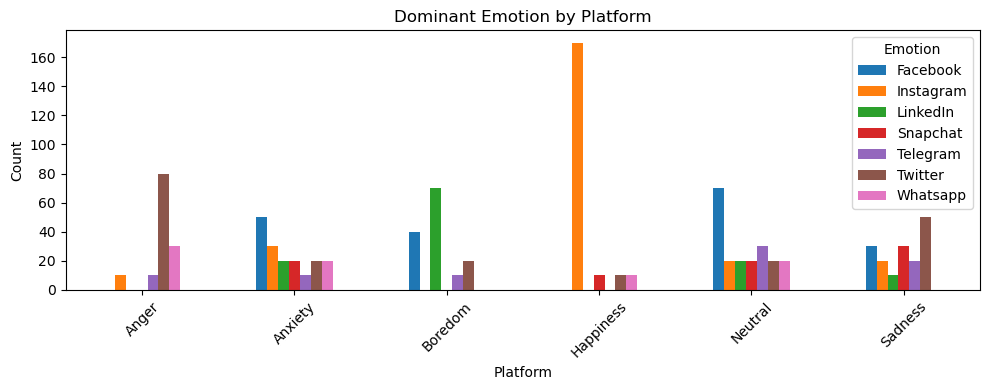

In [558]:
# Histogram for the distribution of platforms
plt.figure(figsize=(10, 4))
sns.histplot(data=social_df, x='Platform', discrete=True, kde=False)
plt.title('Histogram of Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Group the data by race
grouped_data = social_df.groupby('Platform')['Dominant_Emotion']

# Calculate descriptive statistics, I will be using this grouping method for my final project as well
descriptive_stats = grouped_data.describe()

# Contingency table for Dominant Emotion by Platform
contingency_table_platform_emotion = pd.crosstab(social_df['Dominant_Emotion'], social_df['Platform'])

# Perform the Chi-Square test - chi tests are used to determine whether there is a significant association between two categorical variables.  
chi2, p, dof, ex = stats.chi2_contingency(contingency_table_platform_emotion)

# Bar chart Dominant Emotion by Platform
contingency_table_platform_emotion.plot(kind='bar', figsize=(10, 4))

plt.title('Dominant Emotion by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Display results
print("\n", descriptive_stats)
print("\nContingency Table:\n")
print(contingency_table_platform_emotion, "\n")

# Print results
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}, degrees of freedom = {dof}", "\n")
# Currently Chi-Square is incorrect

**Conduct T-Tests for Dominant Emotion Per Platform**

In [559]:
# Get unique dominant emotions and platforms
emotions = social_df['Dominant_Emotion'].unique()
platforms = social_df['Platform'].unique()

# Function to perform pairwise t-tests - need to do this form of testing to 
def pairwise_t_tests(data, group_col, value_col):
    results = {}
    groups = data[group_col].unique()
    for group1, group2 in combinations(groups, 2):
        group1_data = data[data[group_col] == group1][value_col].dropna()
        group2_data = data[data[group_col] == group2][value_col].dropna()
        t_stat, p_val = stats.ttest_ind(group1_data, group2_data)
        results[(group1, group2)] = (t_stat, p_val)
    return results

# Perform t-tests for each emotion
t_test_results = {}
for emotion in emotions:
    emotion_data = social_df[social_df['Dominant_Emotion'] == emotion]
    t_test_results[emotion] = pairwise_t_tests(emotion_data, 'Platform', 'Age')

# Display the results
for emotion, results in t_test_results.items():
    print(f"Results for {emotion}:")
    for platforms, (t_stat, p_val) in results.items():
        print(f"  {platforms}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
    print()


Results for Happiness:
  ('Instagram', 'Twitter'): t-statistic = -0.2485, p-value = 0.8040
  ('Instagram', 'Snapchat'): t-statistic = 3.1309, p-value = 0.0020
  ('Instagram', 'Whatsapp'): t-statistic = -6.1624, p-value = 0.0000
  ('Twitter', 'Snapchat'): t-statistic = inf, p-value = 0.0000
  ('Twitter', 'Whatsapp'): t-statistic = -inf, p-value = 0.0000
  ('Snapchat', 'Whatsapp'): t-statistic = -inf, p-value = 0.0000

Results for Anger:
  ('Twitter', 'Whatsapp'): t-statistic = -1.0603, p-value = 0.2914
  ('Twitter', 'Instagram'): t-statistic = -9.2790, p-value = 0.0000
  ('Twitter', 'Telegram'): t-statistic = -0.8754, p-value = 0.3838
  ('Whatsapp', 'Instagram'): t-statistic = -4.9425, p-value = 0.0000
  ('Whatsapp', 'Telegram'): t-statistic = 0.0000, p-value = 1.0000
  ('Instagram', 'Telegram'): t-statistic = inf, p-value = 0.0000

Results for Neutral:
  ('Facebook', 'LinkedIn'): t-statistic = -1.9930, p-value = 0.0494
  ('Facebook', 'Twitter'): t-statistic = 1.9092, p-value = 0.0595
 

C:\Users\infin\anaconda3\envs\Pandas\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


### Facebook Data
- Age Hypotheses:
    -  Null Hypothesis (H0): There is no significant relationship between age and dominant emotion on the Facebook platform.
    -  Alternative Hypothesis (H1): There is a significant relationship between age and dominant emotion on the Facebook platform.

- Usage Hypotheses:
    -  Null Hypothesis (H0): There is no significant relationship between daily usage and dominant emotion on the Facebook platform.
    -  Alternative Hypothesis (H1): There is a significant relationship between daily usage and dominant emotion on the Facebook platform.  

**Filter to Facebook Platform**

In [560]:
# Filter the data for the Facebook platform
facebook_subset = social_df[social_df['Platform'] == 'Facebook']

facebook_subset.describe()

,User_ID,Age,Daily_Usage_Minutes,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,496.684211,26.263158,72.105263,1.947368,19.726316,8.663158,16.694737
std,289.397852,3.330826,19.471577,1.148898,7.997939,3.757491,4.606353
min,3.000000,21.000000,40.000000,1.000000,5.000000,2.000000,10.000000
25%,245.000000,23.000000,60.000000,1.000000,12.000000,5.000000,12.000000
50%,500.000000,26.000000,70.000000,2.000000,20.000000,8.500000,18.000000
75%,743.000000,29.000000,85.000000,2.000000,27.000000,12.000000,20.000000
max,997.000000,33.000000,110.000000,6.000000,35.000000,16.000000,25.000000


**Describe Targeted/Grouped Data - Dominant Emotion by Age**

In [561]:
# Descriptive Statistics
cross_reference_age_emotion = facebook_subset.groupby('Dominant_Emotion')['Age'].describe()
print("Cross-reference of Age with Dominant Emotion on Facebook:")
print(cross_reference_age_emotion)

Cross-reference of Age with Dominant Emotion on Facebook:
                  count       mean       std   min   25%   50%   75%   max
Dominant_Emotion                                                          
Anxiety            50.0  28.400000  2.602981  26.0  26.0  28.0  29.0  33.0
Boredom            40.0  28.000000  1.012739  27.0  27.0  28.0  29.0  29.0
Neutral            70.0  24.142857  3.823216  21.0  21.0  22.0  29.0  31.0
Sadness            30.0  25.333333  0.958927  24.0  24.0  26.0  26.0  26.0


**Describe Targeted/Grouped Data - Dominant Emotion by Daily Usage**

Cross-reference of Daily Usage with Dominant Emotion on Twitter:

                  count       mean        std   min   25%   50%     75%    max
Dominant_Emotion                                                              
Anxiety            50.0  76.000000  12.936264  65.0  65.0  75.0   75.00  100.0
Boredom            40.0  61.250000   9.040507  50.0  57.5  60.0   63.75   75.0
Neutral            70.0  70.714286  20.041365  40.0  55.0  70.0   85.00  105.0
Sadness            30.0  83.333333  28.263945  45.0  45.0  95.0  110.00  110.0


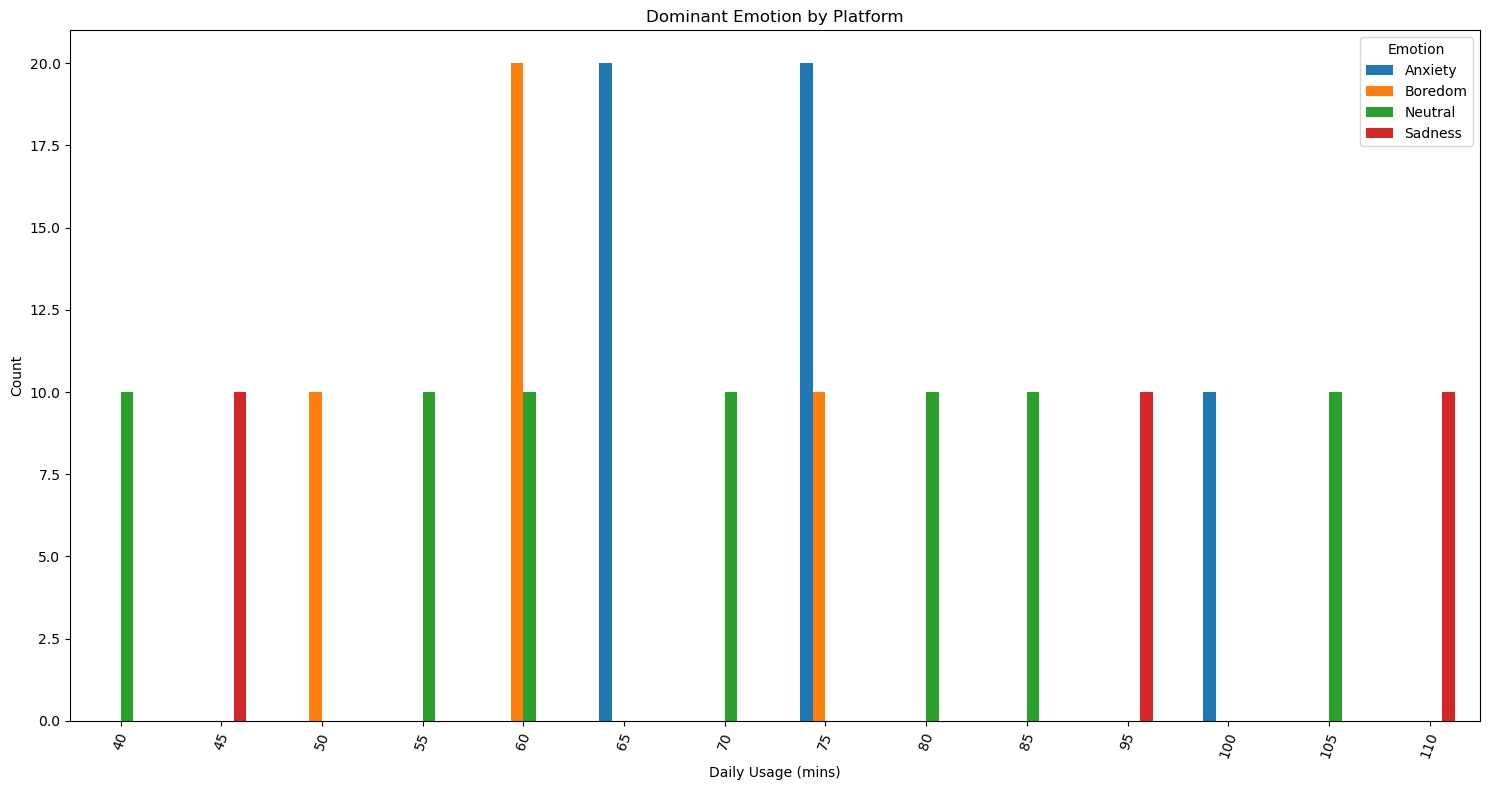

In [562]:
# Descriptive Statistics
contingency_emotion_usage = pd.crosstab(facebook_subset['Daily_Usage_Minutes'], facebook_subset['Dominant_Emotion'])


cross_reference_emotion_usage = facebook_subset.groupby('Dominant_Emotion')['Daily_Usage_Minutes'].describe()
print("Cross-reference of Daily Usage with Dominant Emotion on Twitter:\n")
print(cross_reference_emotion_usage)



# Plot the bar chart
contingency_emotion_usage.plot(kind='bar', figsize=(15, 8))

plt.title('Dominant Emotion by Platform')
plt.xlabel('Daily Usage (mins)')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=70)
plt.tight_layout()

Box Plot

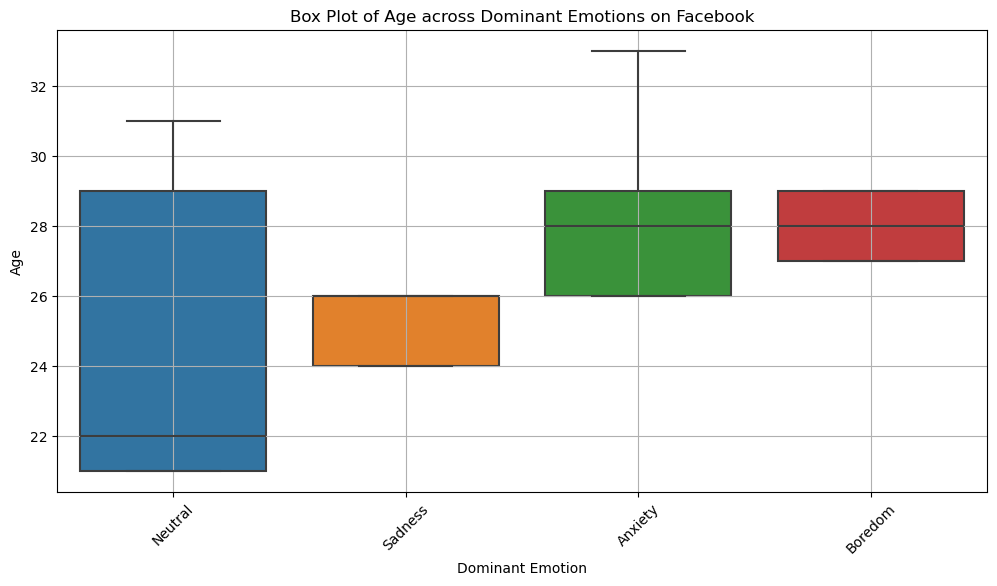

In [563]:
# Box Plot of Age for each Dominant Emotion
plt.figure(figsize=(12, 6))
sns.boxplot(data=facebook_subset, x='Dominant_Emotion', y='Age')
plt.title('Box Plot of Age across Dominant Emotions on Facebook')
plt.xlabel('Dominant Emotion')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Bar Plot

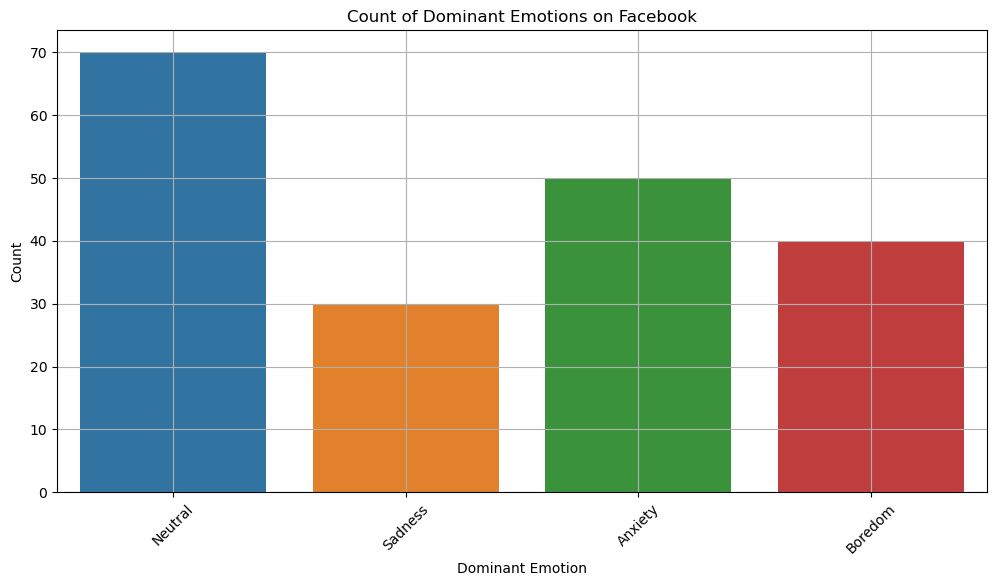

In [564]:
# Bar Plot of the Count of Each Dominant Emotion
plt.figure(figsize=(12, 6))
sns.countplot(data=facebook_subset, x='Dominant_Emotion')
plt.title('Count of Dominant Emotions on Facebook')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Chi-Square Test** 


Contingency Table:
Dominant_Emotion  Anxiety  Boredom  Neutral  Sadness
Age                                                 
21                      0        0       20        0
22                      0        0       20        0
23                      0        0       10        0
24                      0        0        0       10
26                     20        0        0       20
27                      0       20        0        0
28                     10        0        0        0
29                     10       20       10        0
31                      0        0       10        0
33                     10        0        0        0
Chi-Square Test: chi2 = 372.30952380952385, p-value = 2.1101673144632784e-62 



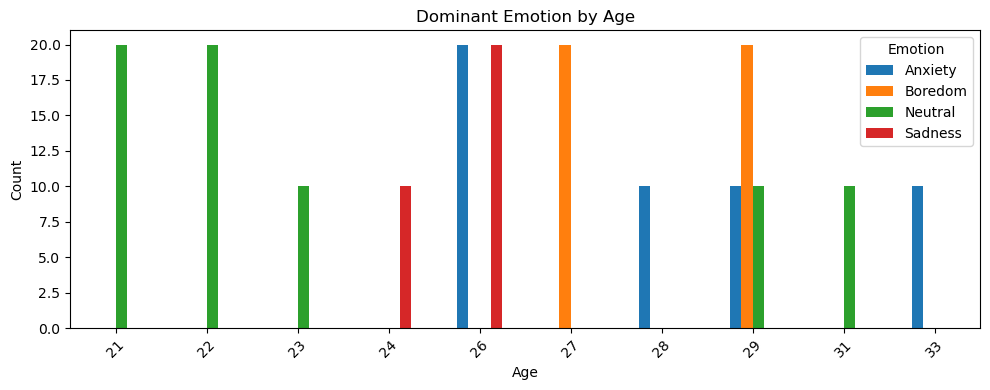

In [565]:
# Chi-Square Test
# Create a contingency table
contingency_table = pd.crosstab(facebook_subset['Dominant_Emotion'], facebook_subset['Age'])
contingency_table_flipped = pd.crosstab(facebook_subset['Age'], facebook_subset['Dominant_Emotion'])

# Plot the bar chart
contingency_table_flipped.plot(kind='bar', figsize=(10, 4))

plt.title('Dominant Emotion by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the results
print("\nContingency Table:")
print(contingency_table_flipped)

# Perform the Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}" , "\n")


T-Tests

In [566]:
# T-Test
# Perform pairwise T-tests for age across different dominant emotions
emotions = facebook_subset['Dominant_Emotion'].unique()

# Conduct pairwise T-tests
t_test_results = {}
for emotion1, emotion2 in combinations(emotions, 2):
    group1 = facebook_subset[facebook_subset['Dominant_Emotion'] == emotion1]['Age'].dropna()
    group2 = facebook_subset[facebook_subset['Dominant_Emotion'] == emotion2]['Age'].dropna()
    t_stat, p_val = stats.ttest_ind(group1, group2)
    t_test_results[(emotion1, emotion2)] = (t_stat, p_val)

print("Pairwise T-test results:")
for key, value in t_test_results.items():
    print(f"{key}: t-statistic = {value[0]}, p-value = {value[1]}")

Pairwise T-test results:
('Neutral', 'Sadness'): t-statistic = -1.6785074633458787, p-value = 0.09643421544110535
('Neutral', 'Anxiety'): t-statistic = -6.821150743890093, p-value = 4.1064853963377626e-10
('Neutral', 'Boredom'): t-statistic = -6.24541446843891, p-value = 8.529373399628306e-09
('Sadness', 'Anxiety'): t-statistic = -6.192542583068983, p-value = 2.5836414908229215e-08
('Sadness', 'Boredom'): t-statistic = -11.150912838994719, p-value = 5.274756515212388e-17
('Anxiety', 'Boredom'): t-statistic = 0.9171145859050562, p-value = 0.3615892421659599


### Instagram Data
- Age Hypotheses:
    -  Null Hypothesis (H0): There is no significant relationship between age and dominant emotion on the Instagram platform.
    -  Alternative Hypothesis (H1): There is a significant relationship between age and dominant emotion on the Instagram platform.
      
- Usage Hypotheses:
    -  Null Hypothesis (H0): There is no significant relationship between daily usage and dominant emotion on the Instagram platform.
    -  Alternative Hypothesis (H1): There is a significant relationship between daily usage and dominant emotion on the Instagram platform.  

**Filter to Instragram Platform**

In [567]:
# Filter the data for the Facebook platform
instagram_subset = social_df[social_df['Platform'] == 'Instagram']

print("Instagram Descriptive Data:\n")
instagram_subset.describe()
# Formulate Hypotheses
# H0: There is no significant relationship between age and dominant emotion on the Instagram platform.
# H1: There is a significant relationship between age and dominant emotion on the Facebook platform.

Instagram Descriptive Data:



,User_ID,Age,Daily_Usage_Minutes,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,492.040000,28.080000,153.400000,5.800000,79.272000,26.792000,33.508000
std,289.064198,4.259834,22.348104,1.270613,15.317458,5.957407,6.368372
min,1.000000,21.000000,115.000000,3.000000,45.000000,10.000000,12.000000
25%,239.750000,25.000000,140.000000,5.000000,65.000000,22.000000,30.000000
50%,498.000000,28.000000,150.000000,6.000000,80.000000,26.000000,31.000000
75%,738.500000,32.000000,170.000000,7.000000,90.000000,30.000000,38.000000
max,995.000000,35.000000,200.000000,8.000000,110.000000,40.000000,50.000000


**Describe Targeted/Grouped Data - Dominant Emotion by Age**

In [568]:
# Descriptive Statistics
cross_reference_age_emotion = instagram_subset.groupby('Dominant_Emotion')['Age'].describe()

print("Cross-reference of Age with Dominant Emotion on Instagram:\n")
print(cross_reference_age_emotion)

Cross-reference of Age with Dominant Emotion on Instagram:

                  count       mean       std   min   25%   50%   75%   max
Dominant_Emotion                                                          
Anger              10.0  34.000000  0.000000  34.0  34.0  34.0  34.0  34.0
Anxiety            30.0  29.666667  3.924576  26.0  26.0  28.0  35.0  35.0
Happiness         170.0  27.705882  3.733183  21.0  25.0  28.0  31.0  33.0
Neutral            20.0  27.000000  5.129892  22.0  22.0  27.0  32.0  32.0
Sadness            20.0  27.000000  6.155870  21.0  21.0  27.0  33.0  33.0


**Describe Targeted/Grouped Data - Dominant Emotion by Daily Usage**

Cross-reference of Daily Usage with Dominant Emotion on Instagram:

                  count        mean        std    min    25%    50%    75%  \
Dominant_Emotion                                                             
Anger              10.0  120.000000   0.000000  120.0  120.0  120.0  120.0   
Anxiety            30.0  158.333333  31.713516  125.0  125.0  150.0  200.0   
Happiness         170.0  160.000000  17.114304  120.0  150.0  165.0  170.0   
Neutral            20.0  122.500000   7.694838  115.0  115.0  122.5  130.0   
Sadness            20.0  137.500000   7.694838  130.0  130.0  137.5  145.0   

                    max  
Dominant_Emotion         
Anger             120.0  
Anxiety           200.0  
Happiness         190.0  
Neutral           130.0  
Sadness           145.0  


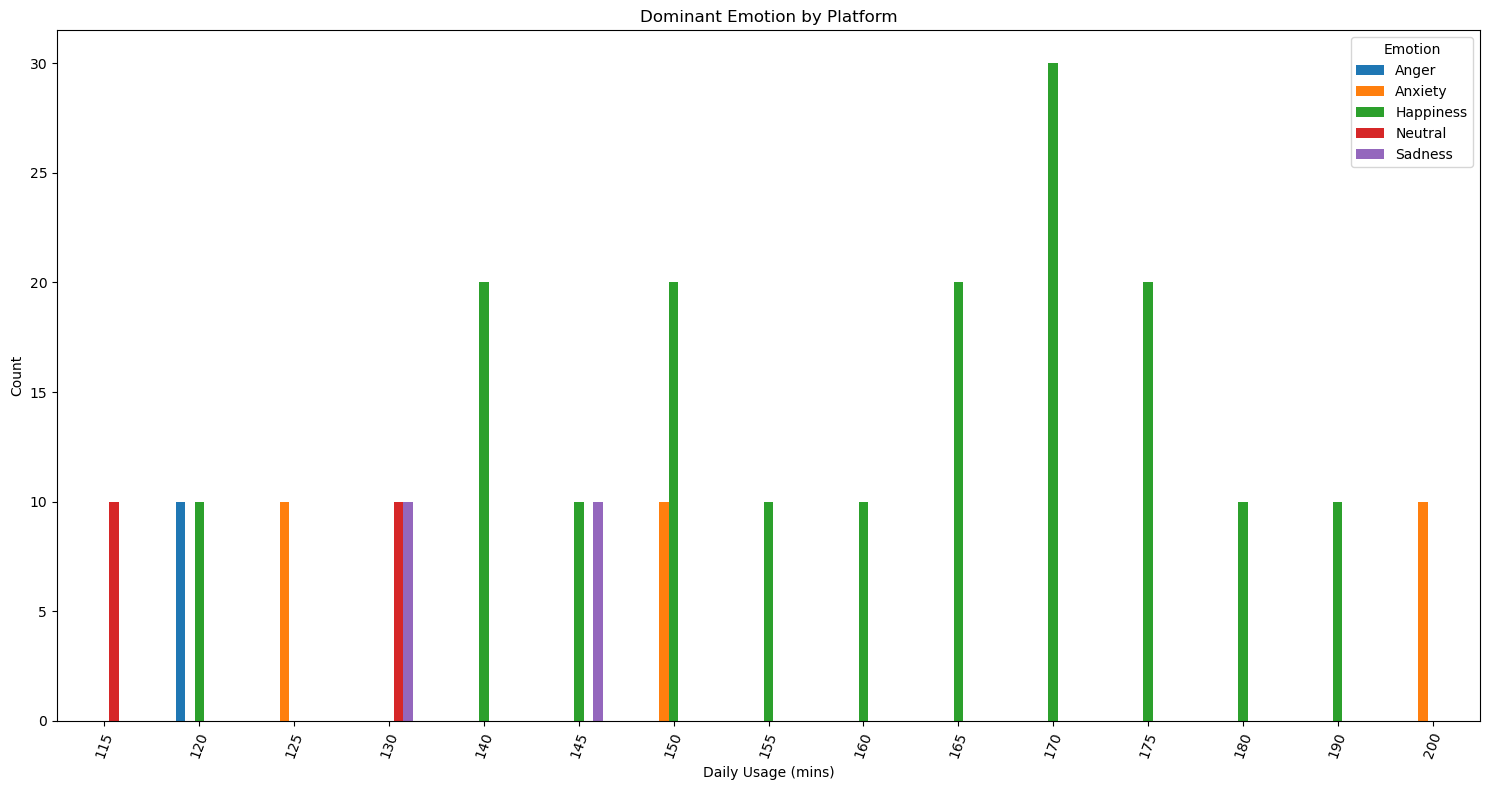

In [569]:
# Descriptive Statistics
contingency_emotion_usage = pd.crosstab(instagram_subset['Daily_Usage_Minutes'], instagram_subset['Dominant_Emotion'])


cross_reference_emotion_usage = instagram_subset.groupby('Dominant_Emotion')['Daily_Usage_Minutes'].describe()
print("Cross-reference of Daily Usage with Dominant Emotion on Instagram:\n")
print(cross_reference_emotion_usage)



# Plot the bar chart
contingency_emotion_usage.plot(kind='bar', figsize=(15, 8))

plt.title('Dominant Emotion by Platform')
plt.xlabel('Daily Usage (mins)')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=70)
plt.tight_layout()

**Box Plot**

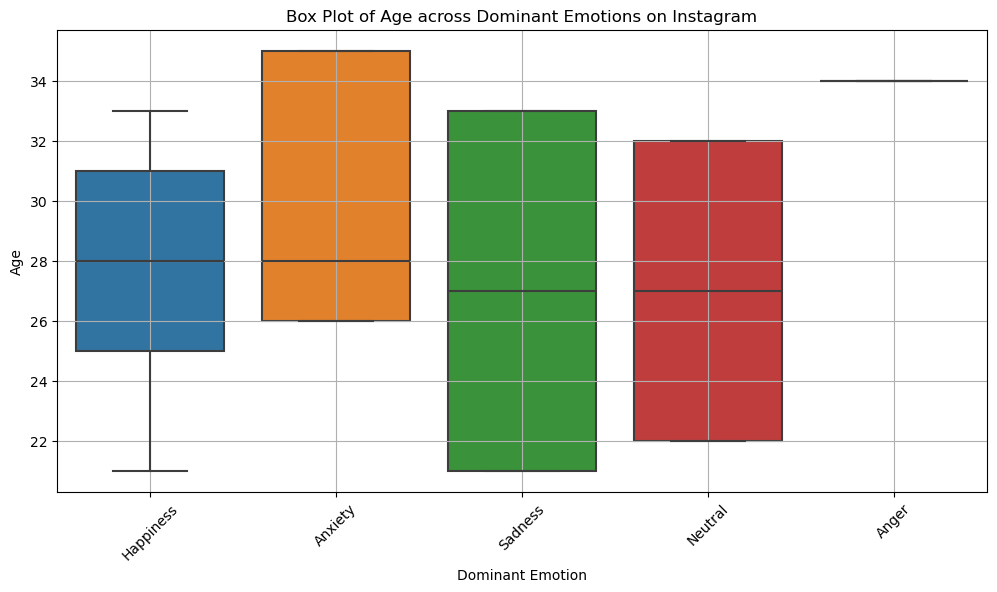

In [570]:
# Box Plot of Age for each Dominant Emotion
plt.figure(figsize=(12, 6))
sns.boxplot(data=instagram_subset, x='Dominant_Emotion', y='Age')
plt.title('Box Plot of Age across Dominant Emotions on Instagram')
plt.xlabel('Dominant Emotion')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Bar Plot**

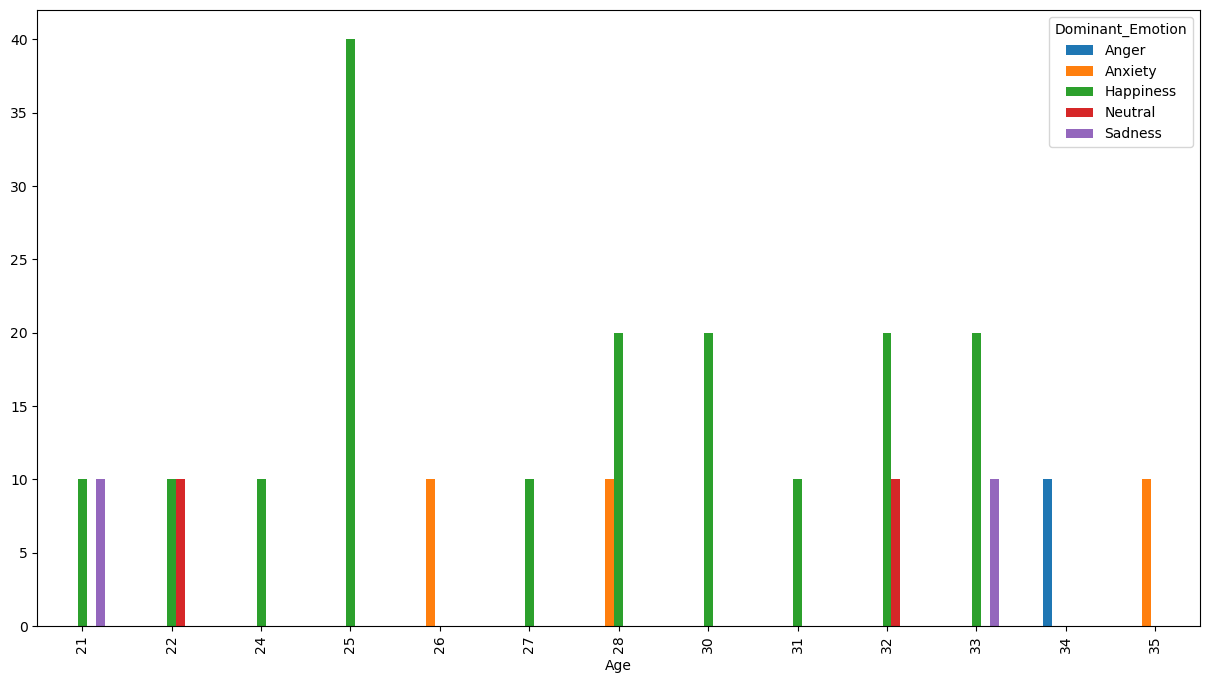

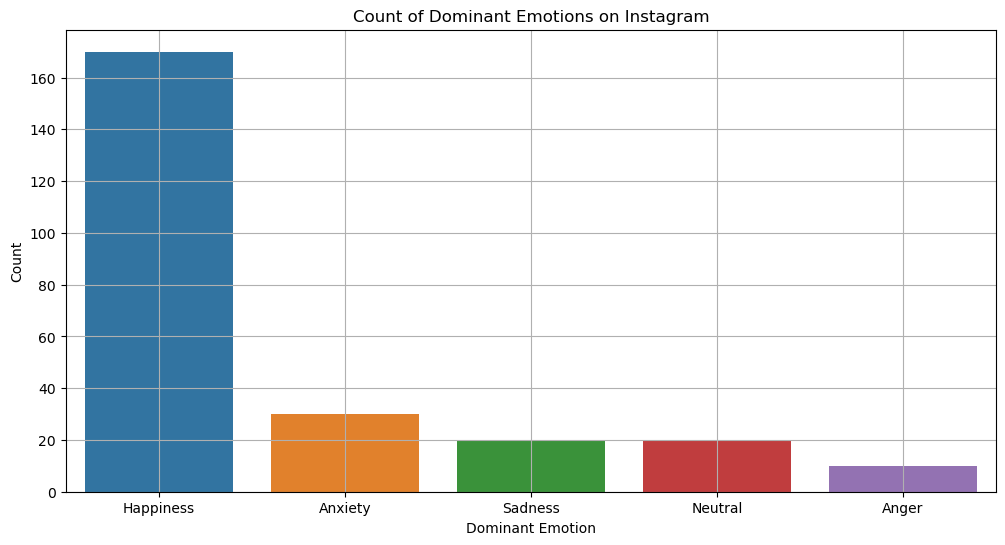

In [571]:
# Bar Plot of the Count of Each Dominant Emotion
contingency_table_flipped = pd.crosstab(instagram_subset['Age'], instagram_subset['Dominant_Emotion'])
contingency_table_flipped.plot(kind='bar', figsize=(15, 8))

plt.figure(figsize=(12, 6))
sns.countplot(data=instagram_subset, x='Dominant_Emotion')
plt.title('Count of Dominant Emotions on Instagram')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#### **Chi-Square Tests**

**Age Chi-Square**


 Chi-Square Test: chi2 = 608.6601307189542, p-value = 3.7116990458424385e-98 



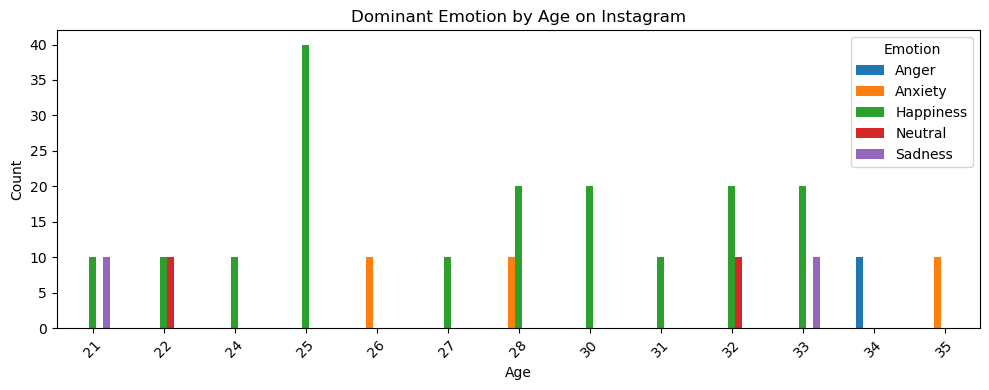

In [572]:
# Create a contingency table
contingency_table_ig = pd.crosstab(instagram_subset['Dominant_Emotion'], instagram_subset['Age'])
contingency_table_flipped_ig = pd.crosstab(instagram_subset['Age'], instagram_subset['Dominant_Emotion'])

# Plot the bar chart
contingency_table_flipped_ig.plot(kind='bar', figsize=(10, 4))

plt.title('Dominant Emotion by Age on Instagram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Perform the Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table_ig)
print("\n", f"Chi-Square Test: chi2 = {chi2}, p-value = {p}" , "\n")

**Daily Usage Chi-Square Test**


 Chi-Square Test: chi2 = 607.4346405228756, p-value = 1.3403566441834e-93 



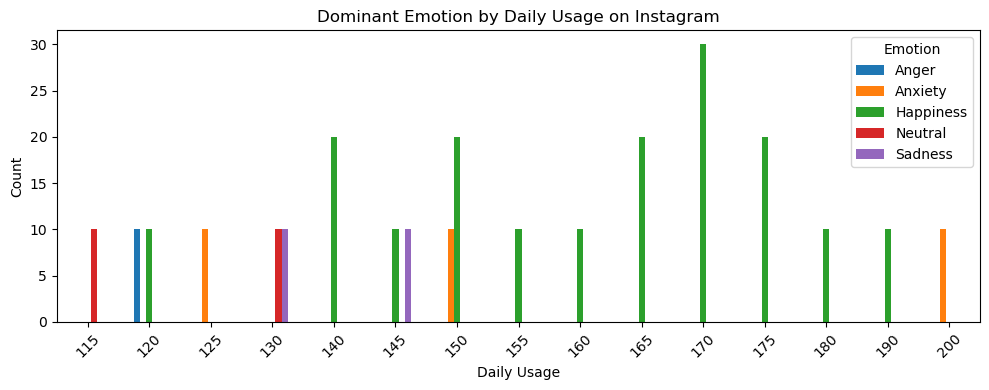

In [573]:
# Create a contingency table
contingency_table_ig = pd.crosstab(instagram_subset['Dominant_Emotion'], instagram_subset['Daily_Usage_Minutes'])
contingency_table_flipped_ig = pd.crosstab(instagram_subset['Daily_Usage_Minutes'], instagram_subset['Dominant_Emotion'])

# Plot the bar chart
contingency_table_flipped_ig.plot(kind='bar', figsize=(10, 4))

plt.title('Dominant Emotion by Daily Usage on Instagram')
plt.xlabel('Daily Usage')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Perform the Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table_ig)
print("\n", f"Chi-Square Test: chi2 = {chi2}, p-value = {p}" , "\n")

#### **T-Tests**

**Age T-Tests**

In [574]:
# T-Test
# Perform pairwise T-tests for age across different dominant emotions
emotions = instagram_subset['Dominant_Emotion'].unique()

# Conduct pairwise T-tests
t_test_results = {}
for emotion1, emotion2 in combinations(emotions, 2):
    group1 = instagram_subset[instagram_subset['Dominant_Emotion'] == emotion1]['Age'].dropna()
    group2 = instagram_subset[instagram_subset['Dominant_Emotion'] == emotion2]['Age'].dropna()
    t_stat, p_val = stats.ttest_ind(group1, group2)
    t_test_results[(emotion1, emotion2)] = (t_stat, p_val)

print("Pairwise T-test results:")
for key, value in t_test_results.items():
    print(f"{key}: t-statistic = {value[0]}, p-value = {value[1]}")

Pairwise T-test results:
('Happiness', 'Anxiety'): t-statistic = -2.632094531644513, p-value = 0.009154932662108775
('Happiness', 'Sadness'): t-statistic = 0.7382961072826768, p-value = 0.4612551588910969
('Happiness', 'Neutral'): t-statistic = 0.7662111754701796, p-value = 0.44451164331451265
('Happiness', 'Anger'): t-statistic = -5.317536650197723, p-value = 3.125977297205961e-07
('Anxiety', 'Sadness'): t-statistic = 1.8737281400611845, p-value = 0.06706252871035186
('Anxiety', 'Neutral'): t-statistic = 2.08008667208371, p-value = 0.04288029061697438
('Anxiety', 'Anger'): t-statistic = -3.461407702594723, p-value = 0.0013437611785476168
('Sadness', 'Neutral'): t-statistic = 0.0, p-value = 1.0
('Sadness', 'Anger'): t-statistic = -3.5642255405212087, p-value = 0.0013334293384030186
('Neutral', 'Anger'): t-statistic = -4.27707064862545, p-value = 0.00019909582395247398


C:\Users\infin\anaconda3\envs\Pandas\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


**Usage T-Tests**

In [575]:
# T-Test
# Perform pairwise T-tests for dominant emotion across daily usage
emotions = instagram_subset['Dominant_Emotion'].unique()

# Conduct pairwise T-tests
t_test_results = {}
for emotion1, emotion2 in combinations(emotions, 2):
    group1 = instagram_subset[instagram_subset['Dominant_Emotion'] == emotion1]['Daily_Usage_Minutes'].dropna()
    group2 = instagram_subset[instagram_subset['Dominant_Emotion'] == emotion2]['Daily_Usage_Minutes'].dropna()
    t_stat, p_val = stats.ttest_ind(group1, group2)
    t_test_results[(emotion1, emotion2)] = (t_stat, p_val)

print("Pairwise T-test results:")
for key, value in t_test_results.items():
    print(f"{key}: t-statistic = {value[0]}, p-value = {value[1]}")

Pairwise T-test results:
('Happiness', 'Anxiety'): t-statistic = 0.42223677990563857, p-value = 0.6733103267980076
('Happiness', 'Sadness'): t-statistic = 5.800181485363875, p-value = 2.7620844832346673e-08
('Happiness', 'Neutral'): t-statistic = 9.666969142273125, p-value = 3.3596020884561065e-18
('Happiness', 'Anger'): t-statistic = 7.371495438892413, p-value = 6.117446221053582e-12
('Anxiety', 'Sadness'): t-statistic = 2.8728200275324376, p-value = 0.006041716583039583
('Anxiety', 'Neutral'): t-statistic = 4.941250447355792, p-value = 9.844642961394271e-06
('Anxiety', 'Anger'): t-statistic = 3.7892705668204045, p-value = 0.0005248612711937475
('Sadness', 'Neutral'): t-statistic = 6.164414002968976, p-value = 3.3873272230951456e-07
('Sadness', 'Anger'): t-statistic = 7.128451081042417, p-value = 9.328959725038259e-08
('Neutral', 'Anger'): t-statistic = 1.0183501544346312, p-value = 0.3172305566444582


### Twitter Data
- Age Hypotheses:
    -  Null Hypothesis (H0): There is no significant relationship between age and dominant emotion on the Twitter platform.
    -  Alternative Hypothesis (H1): There is a significant relationship between age and dominant emotion on the Twitter platform.
      
- Usage Hypotheses:
    -  Null Hypothesis (H0): There is no significant relationship between daily usage and dominant emotion on the Twitter platform.
    -  Alternative Hypothesis (H1): There is a significant relationship between daily usage and dominant emotion on the Twitterplatform.  

**Filter to Twitter Platform**

In [576]:
# Filter the data for the Facebook platform
twitter_subset = social_df[social_df['Platform'] == 'Twitter']

print("Twitter Descriptive Data:\n")
twitter_subset.describe()
# Formulate Hypotheses
# H0: There is no significant relationship between age and dominant emotion on the Twitter platform.
# H1: There is a significant relationship between age and dominant emotion on the Twitter platform.

Twitter Descriptive Data:



,User_ID,Age,Daily_Usage_Minutes,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,494.300000,26.700000,83.750000,3.405000,35.245000,16.575000,21.17000
std,289.347229,3.698431,10.852483,1.288127,9.888574,5.183504,4.19872
min,2.000000,21.000000,70.000000,1.000000,12.000000,5.000000,10.00000
25%,241.750000,23.750000,73.750000,3.000000,30.000000,14.000000,18.00000
50%,499.000000,27.000000,85.000000,3.500000,35.000000,18.000000,22.00000
75%,739.250000,29.250000,90.000000,4.000000,43.000000,20.000000,24.00000
max,996.000000,35.000000,105.000000,6.000000,50.000000,30.000000,30.00000


**Describe Targeted/Grouped Data - Dominant Emotion by Age**

In [577]:
# Descriptive Statistics
cross_reference_age_emotion = twitter_subset.groupby('Dominant_Emotion')['Age'].describe()

print("Cross-reference of Age with Dominant Emotion on Twitter:\n")
print(cross_reference_age_emotion)

Cross-reference of Age with Dominant Emotion on Twitter:

                  count    mean       std   min    25%   50%    75%   max
Dominant_Emotion                                                         
Anger              80.0  27.375  2.246657  24.0  26.25  27.5  29.25  30.0
Anxiety            20.0  26.500  3.590924  23.0  23.00  26.5  30.00  30.0
Boredom            20.0  34.000  1.025978  33.0  33.00  34.0  35.00  35.0
Happiness          10.0  28.000  0.000000  28.0  28.00  28.0  28.00  28.0
Neutral            20.0  22.500  0.512989  22.0  22.00  22.5  23.00  23.0
Sadness            50.0  24.200  2.338672  21.0  22.00  25.0  26.00  27.0


**Describe Targeted/Grouped Data - Dominant Emotion by Daily Usage**

Cross-reference of Daily Usage with Dominant Emotion on Twitter:

                  count    mean       std   min   25%   50%    75%    max
Dominant_Emotion                                                         
Anger              80.0  90.625  8.872336  75.0  85.0  90.0  96.25  105.0
Anxiety            20.0  72.500  2.564946  70.0  70.0  72.5  75.00   75.0
Boredom            20.0  77.500  7.694838  70.0  70.0  77.5  85.00   85.0
Happiness          10.0  95.000  0.000000  95.0  95.0  95.0  95.00   95.0
Neutral            20.0  70.000  0.000000  70.0  70.0  70.0  70.00   70.0
Sadness            50.0  83.000  8.806306  70.0  75.0  90.0  90.00   90.0


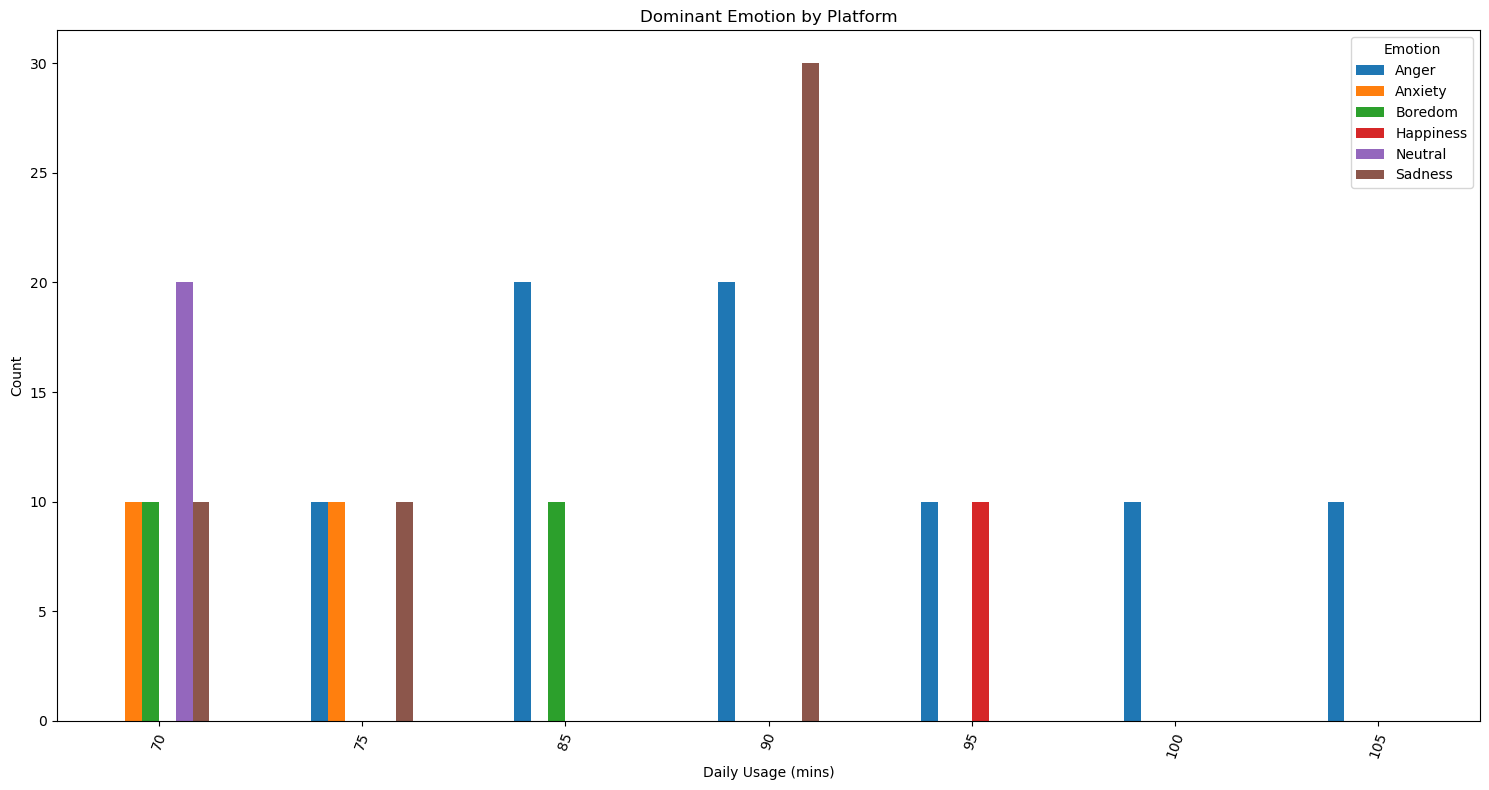

In [578]:
# Descriptive Statistics
contingency_emotion_usage = pd.crosstab(twitter_subset['Daily_Usage_Minutes'], twitter_subset['Dominant_Emotion'])


cross_reference_emotion_usage = twitter_subset.groupby('Dominant_Emotion')['Daily_Usage_Minutes'].describe()
print("Cross-reference of Daily Usage with Dominant Emotion on Twitter:\n")
print(cross_reference_emotion_usage)



# Plot the bar chart
contingency_emotion_usage.plot(kind='bar', figsize=(15, 8))

plt.title('Dominant Emotion by Platform')
plt.xlabel('Daily Usage (mins)')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=70)
plt.tight_layout()

**Box Plot**

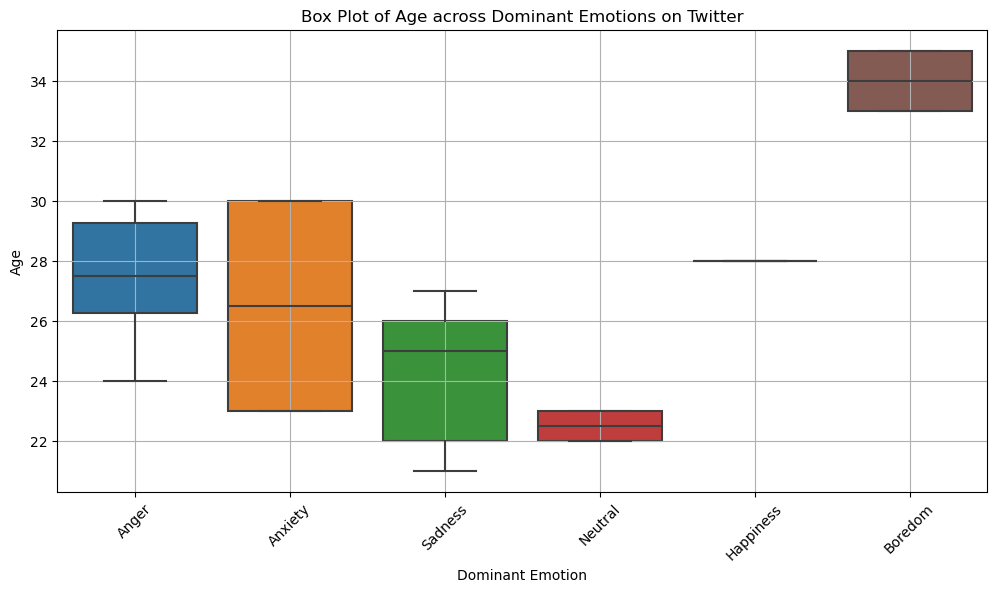

In [579]:
# Box Plot of Age for each Dominant Emotion
plt.figure(figsize=(12, 6))
sns.boxplot(data=twitter_subset, x='Dominant_Emotion', y='Age')
plt.title('Box Plot of Age across Dominant Emotions on Twitter')
plt.xlabel('Dominant Emotion')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Bar Plot**

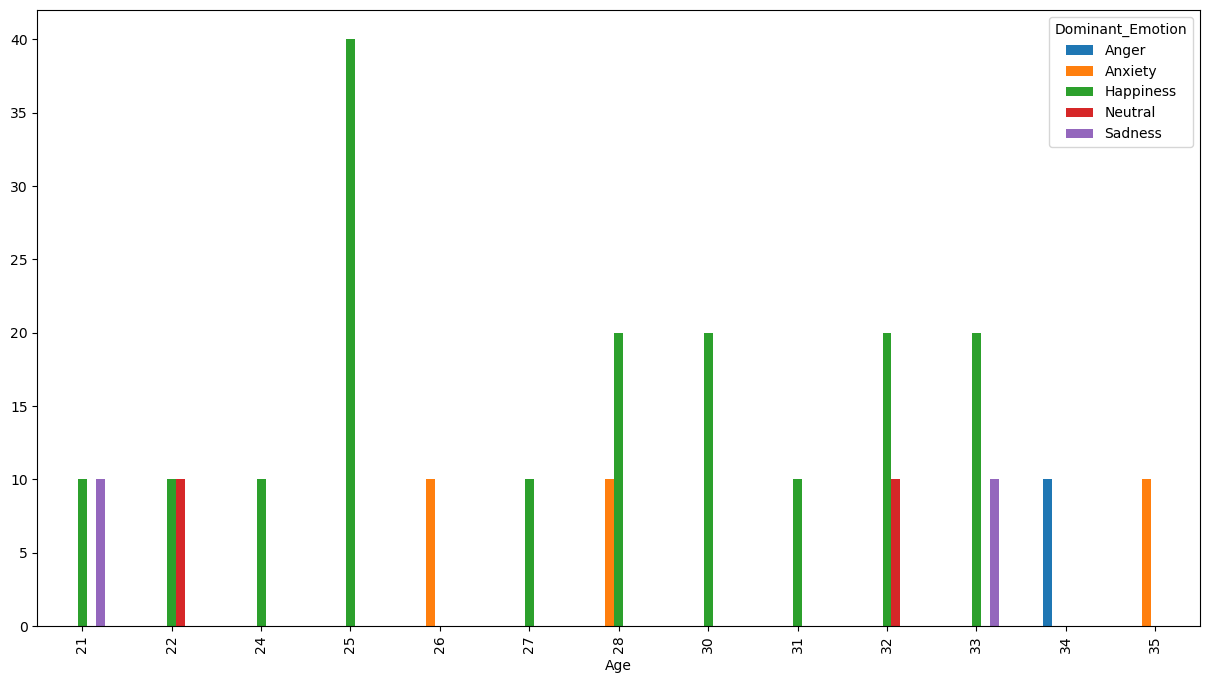

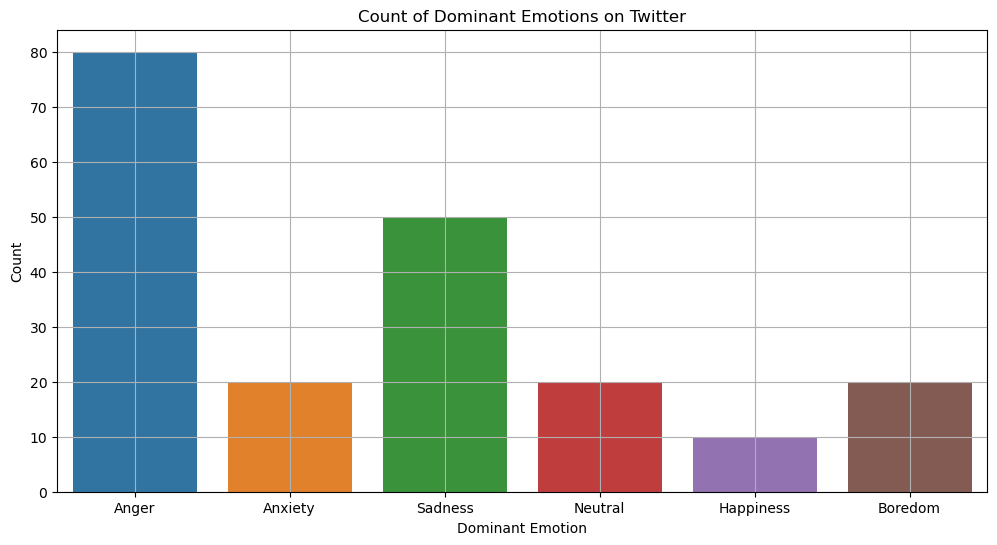

In [580]:
# Bar Plot of the Count of Each Dominant Emotion

contingency_table_flipped.plot(kind='bar', figsize=(15, 8))

plt.figure(figsize=(12, 6))
sns.countplot(data=twitter_subset, x='Dominant_Emotion')
plt.title('Count of Dominant Emotions on Twitter')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.grid(True)
plt.show()

 #### **Chi-Square Tests**

**Age Chi-Square**


 Chi-Square Test: chi2 = 590.8333333333334, p-value = 7.763689734444644e-91 



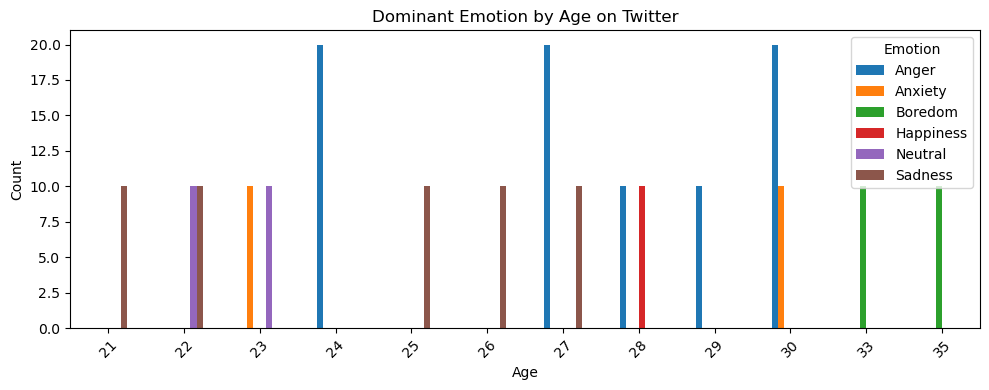

In [581]:
# Create a contingency table
contingency_table_ig = pd.crosstab(twitter_subset['Dominant_Emotion'], twitter_subset['Age'])
contingency_table_flipped_ig = pd.crosstab(twitter_subset['Age'], twitter_subset['Dominant_Emotion'])

# Plot the bar chart
contingency_table_flipped_ig.plot(kind='bar', figsize=(10, 4))

plt.title('Dominant Emotion by Age on Twitter')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Perform the Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table_ig)
print("\n", f"Chi-Square Test: chi2 = {chi2}, p-value = {p}" , "\n")

**Usage Chi-Sqaure**


 Chi-Square Test: chi2 = 304.1666666666667, p-value = 3.994003712776512e-47 



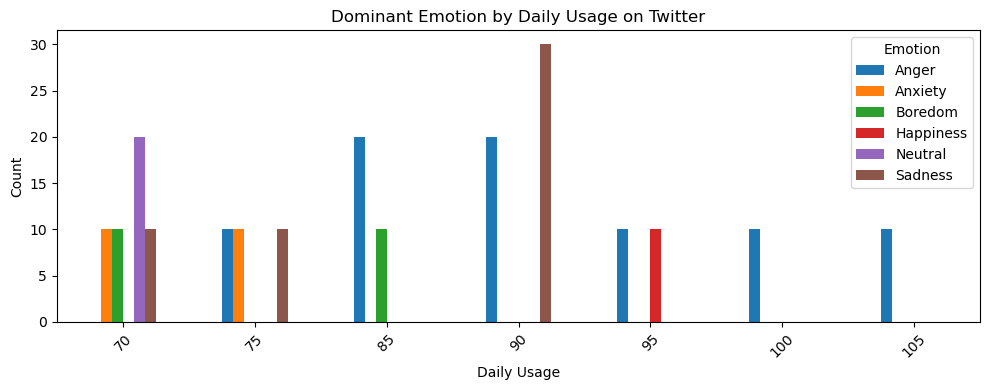

In [582]:
# Create a contingency table
contingency_table_ig = pd.crosstab(twitter_subset['Dominant_Emotion'], twitter_subset['Daily_Usage_Minutes'])
contingency_table_flipped_ig = pd.crosstab(twitter_subset['Daily_Usage_Minutes'], twitter_subset['Dominant_Emotion'])

# Plot the bar chart
contingency_table_flipped_ig.plot(kind='bar', figsize=(10, 4))

plt.title('Dominant Emotion by Daily Usage on Twitter')
plt.xlabel('Daily Usage')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Perform the Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table_ig)
print("\n", f"Chi-Square Test: chi2 = {chi2}, p-value = {p}" , "\n")

#### **T-Tests**

**Age T-Tests**

In [583]:
# T-Test
# Perform pairwise T-tests for age across different dominant emotions
emotions = twitter_subset['Dominant_Emotion'].unique()

# Conduct pairwise T-tests
t_test_results = {}
for emotion1, emotion2 in combinations(emotions, 2):
    group1 = twitter_subset[twitter_subset['Dominant_Emotion'] == emotion1]['Age'].dropna()
    group2 = twitter_subset[twitter_subset['Dominant_Emotion'] == emotion2]['Age'].dropna()
    t_stat, p_val = stats.ttest_ind(group1, group2)
    t_test_results[(emotion1, emotion2)] = (t_stat, p_val)

print("Pairwise T-test results:")
for key, value in t_test_results.items():
    print(f"{key}: t-statistic = {value[0]}, p-value = {value[1]}")

Pairwise T-test results:
('Anger', 'Anxiety'): t-statistic = 1.3655967080115705, p-value = 0.17519178271542202
('Anger', 'Sadness'): t-statistic = 7.716591705266487, p-value = 2.9667056166942818e-12
('Anger', 'Neutral'): t-statistic = 9.60707943301179, p-value = 8.627248536714974e-16
('Anger', 'Happiness'): t-statistic = -0.875376219064817, p-value = 0.3837522919032763
('Anger', 'Boredom'): t-statistic = -12.819807435627384, p-value = 1.1202997380644965e-22
('Anxiety', 'Sadness'): t-statistic = 3.1650063800388217, p-value = 0.0023204204385241815
('Anxiety', 'Neutral'): t-statistic = 4.931531202375181, p-value = 1.6438700334552297e-05
('Anxiety', 'Happiness'): t-statistic = -1.3093073414159544, p-value = 0.20107335807489865
('Anxiety', 'Boredom'): t-statistic = -8.981112256201376, p-value = 6.196033237550092e-11
('Sadness', 'Neutral'): t-statistic = 3.206808560042833, p-value = 0.002046718271257754
('Sadness', 'Happiness'): t-statistic = -5.103164563015182, p-value = 3.862380391313066e-

C:\Users\infin\anaconda3\envs\Pandas\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


**Usage T-Tests**

In [584]:
# T-Test
# Perform pairwise T-tests for dominant emotion across daily usage
emotions = twitter_subset['Dominant_Emotion'].unique()

# Conduct pairwise T-tests
t_test_results = {}
for emotion1, emotion2 in combinations(emotions, 2):
    group1 = twitter_subset[twitter_subset['Dominant_Emotion'] == emotion1]['Daily_Usage_Minutes'].dropna()
    group2 = twitter_subset[twitter_subset['Dominant_Emotion'] == emotion2]['Daily_Usage_Minutes'].dropna()
    t_stat, p_val = stats.ttest_ind(group1, group2)
    t_test_results[(emotion1, emotion2)] = (t_stat, p_val)

print("Pairwise T-test results:")
for key, value in t_test_results.items():
    print(f"{key}: t-statistic = {value[0]}, p-value = {value[1]}")

Pairwise T-test results:
('Anger', 'Anxiety'): t-statistic = 9.011104260855047, p-value = 1.6925066017689062e-14
('Anger', 'Sadness'): t-statistic = 4.780753839596978, p-value = 4.717659295640469e-06
('Anger', 'Neutral'): t-statistic = 10.35655789619729, p-value = 2.0399232994694737e-17
('Anger', 'Happiness'): t-statistic = -1.5516422020464036, p-value = 0.12433700029621696
('Anger', 'Boredom'): t-statistic = 6.064756928001706, p-value = 2.4805615927525357e-08
('Anxiety', 'Sadness'): t-statistic = -5.223660039074294, p-value = 1.8177591622694864e-06
('Anxiety', 'Neutral'): t-statistic = 4.358898943540674, p-value = 9.6033545892936e-05
('Anxiety', 'Happiness'): t-statistic = -27.49545416973504, p-value = 8.348996731210183e-22
('Anxiety', 'Boredom'): t-statistic = -2.7568097504180447, p-value = 0.008918627040453582
('Sadness', 'Neutral'): t-statistic = 6.572899475786694, p-value = 8.268908220956217e-09
('Sadness', 'Happiness'): t-statistic = -4.279695021106551, p-value = 7.10060298117351

## Comparative Data: Age, Usage & Dominant Emotion Across Top 3 Used Social Media Platforms 

### Filter & Describe Data

In [585]:
# Exclude rows where 'Age' is 'Female'
social_df_filtered = social_df[~social_df['Platform'].isin(['LinkedIn', 'Whatsapp', 'Telegram', 'Snapchat'])]

# Group the data by 
grouped_data_age = social_df_filtered.groupby('Platform')['Age']

# Group the data by 
grouped_data_usage = social_df_filtered.groupby('Platform')['Daily_Usage_Minutes']

# Group the data by 
grouped_data_emotion = social_df_filtered.groupby('Platform')['Dominant_Emotion']

# Display results
social_df_filtered.describe(), grouped_data_age.describe(), grouped_data_usage.describe(), grouped_data_emotion.describe()

(          User_ID         Age  Daily_Usage_Minutes  Posts_Per_Day  \
 count  640.000000  640.000000           640.000000     640.000000   
 mean   494.125000   27.109375           107.500000       3.907812   
 std    288.804969    3.904643            41.433621       2.039347   
 min      1.000000   21.000000            40.000000       1.000000   
 25%    241.500000   24.000000            75.000000       2.000000   
 50%    499.000000   27.000000            95.000000       4.000000   
 75%    740.500000   30.000000           145.000000       6.000000   
 max    997.000000   35.000000           200.000000       8.000000   
 
        Likes_Received_Per_Day  Comments_Received_Per_Day  \
 count              640.000000                 640.000000   
 mean                47.835938                  18.217188   
 std                 28.495443                   9.117286   
 min                  5.000000                   2.000000   
 25%                 25.000000                  11.000000   
 5

## Dominant Emotion by Platform

          count unique        top freq
Platform                              
Facebook    190      4    Neutral   70
Instagram   250      5  Happiness  170
Twitter     200      6      Anger   80 



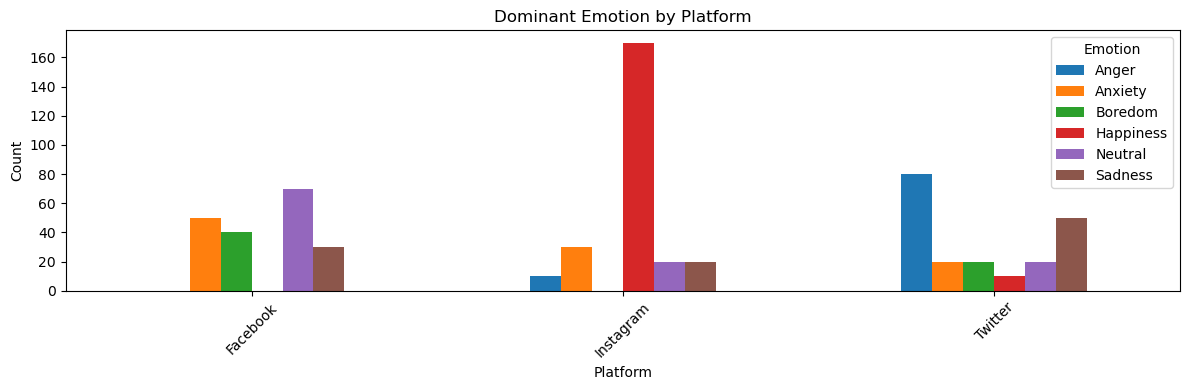

In [586]:
# Create a contingency table that cross-classifies emotion with age
contingency_table_flipped = pd.crosstab(social_df_filtered['Platform'], social_df_filtered['Dominant_Emotion'])

# Plot the bar chart
contingency_table_flipped.plot(kind='bar', figsize=(12, 4))

plt.title('Dominant Emotion by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the results
print(grouped_data_emotion.describe(), "\n")

## Age by Platform

           count       mean       std   min    25%   50%    75%   max
Platform                                                             
Facebook   190.0  26.263158  3.330826  21.0  23.00  26.0  29.00  33.0
Instagram  250.0  28.080000  4.259834  21.0  25.00  28.0  32.00  35.0
Twitter    200.0  26.700000  3.698431  21.0  23.75  27.0  29.25  35.0 



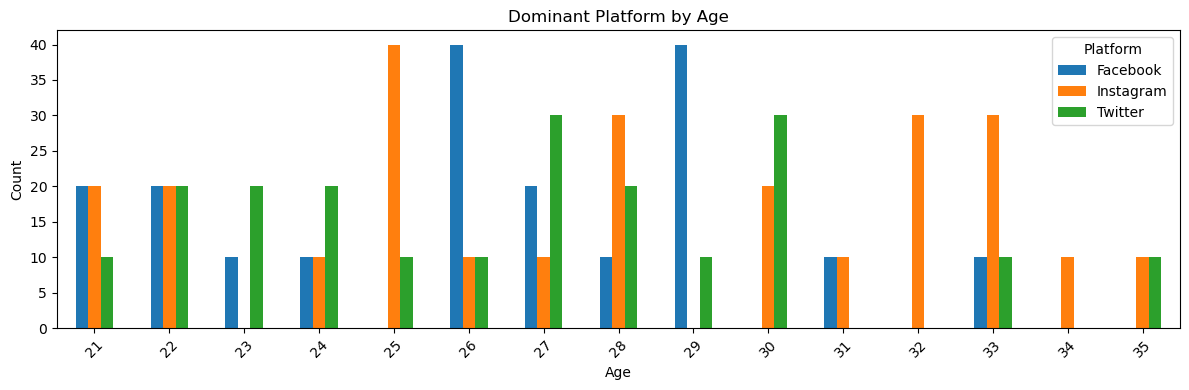

In [587]:
# Create a contingency table that cross-classifies emotion with age
contingency_table_flipped = pd.crosstab(social_df_filtered['Age'], social_df_filtered['Platform'])

# Plot the bar chart
contingency_table_flipped.plot(kind='bar', figsize=(12, 4))

plt.title('Dominant Platform by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Platform')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the results
print(grouped_data_age.describe(), "\n")

## Daily Usage by Platform 

           count        mean        std    min     25%    50%    75%    max
Platform                                                                   
Facebook   190.0   72.105263  19.471577   40.0   60.00   70.0   85.0  110.0
Instagram  250.0  153.400000  22.348104  115.0  140.00  150.0  170.0  200.0
Twitter    200.0   83.750000  10.852483   70.0   73.75   85.0   90.0  105.0 



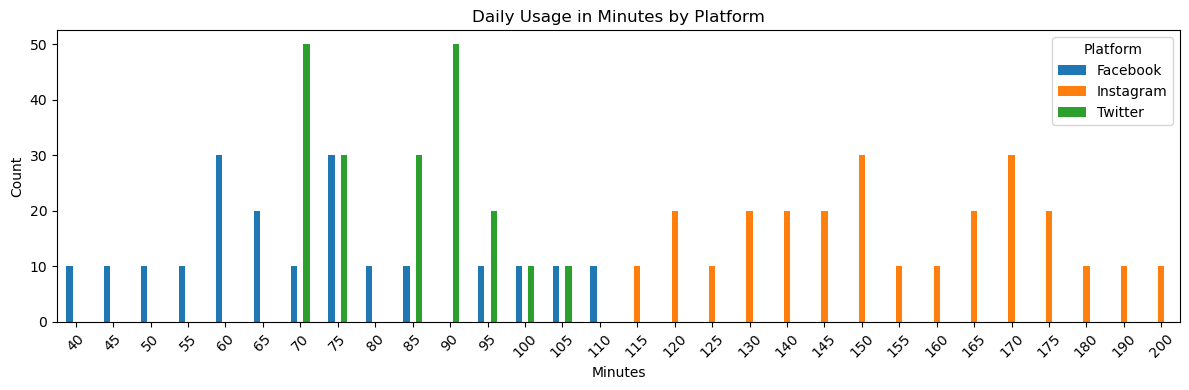

In [588]:
# Create a contingency table that cross-classifies emotion with age
contingency_table_flipped = pd.crosstab(social_df_filtered['Daily_Usage_Minutes'], social_df_filtered['Platform'])

# Plot the bar chart
contingency_table_flipped.plot(kind='bar', figsize=(12, 4))

plt.title('Daily Usage in Minutes by Platform')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.legend(title='Platform')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the results
print(grouped_data_usage.describe(), "\n")

## Section 3: Model Selection and Analysis

<Axes: xlabel='Likes_Received_Per_Day', ylabel='Daily_Usage_Minutes'>

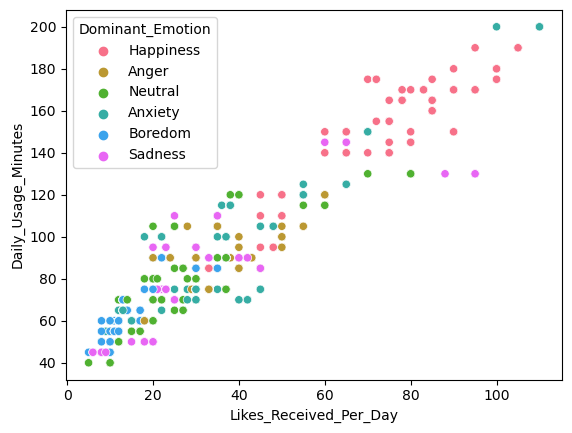

In [45]:
# visualization 'Likes_Received_Per_Day' vs 'Daily_Usage_Time (minutes)' depending on 'Dominant_Emotion'

sns.scatterplot(social_df, x='Likes_Received_Per_Day', y='Daily_Usage_Minutes', hue='Dominant_Emotion', palette="husl", sizes=5)

Model Selection

Anger
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.342
Model:                             OLS   Adj. R-squared:                  0.337
Method:                  Least Squares   F-statistic:                     66.44
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):           2.84e-13
Time:                         22:21:56   Log-Likelihood:                -512.05
No. Observations:                  130   AIC:                             1028.
Df Residuals:                      128   BIC:                             1034.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5732     10.172    

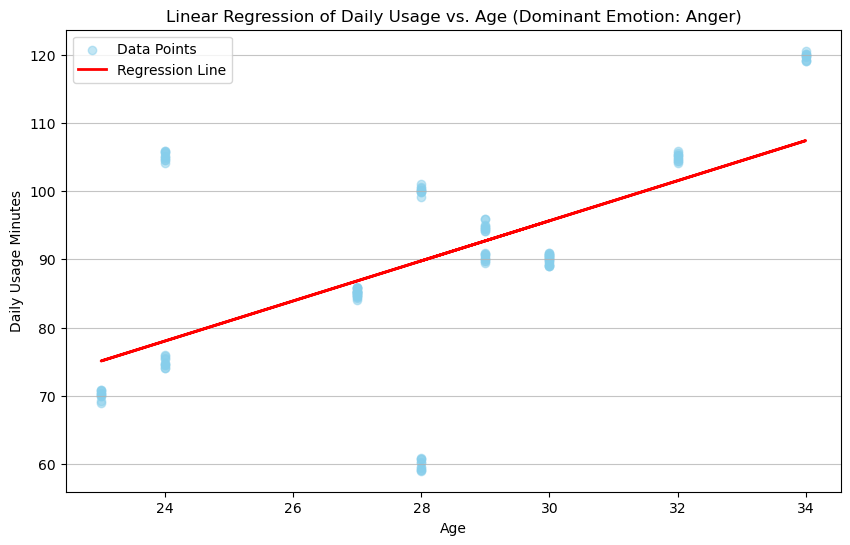

Neutral
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.128
Model:                             OLS   Adj. R-squared:                  0.124
Method:                  Least Squares   F-statistic:                     29.18
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):           1.88e-07
Time:                         22:21:56   Log-Likelihood:                -901.70
No. Observations:                  200   AIC:                             1807.
Df Residuals:                      198   BIC:                             1814.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3038      9.833  

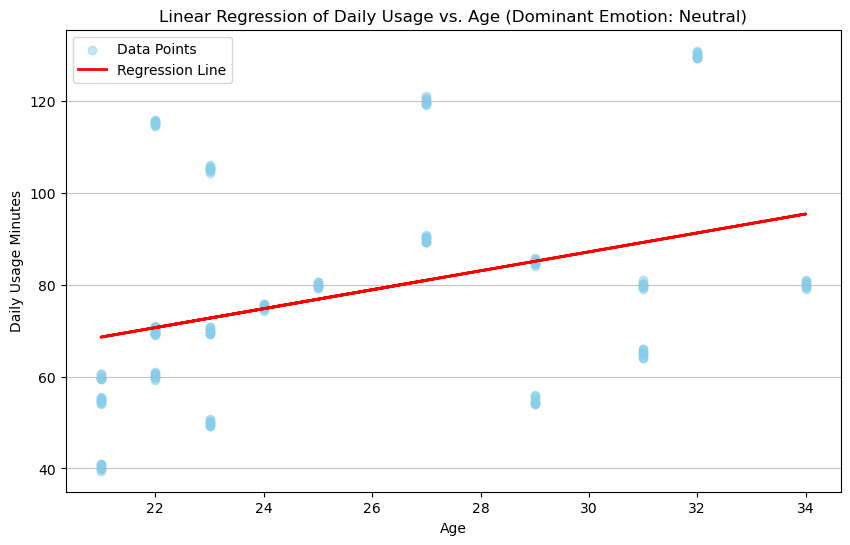

Happiness
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     3.042
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):             0.0827
Time:                         22:21:56   Log-Likelihood:                -947.52
No. Observations:                  200   AIC:                             1899.
Df Residuals:                      198   BIC:                             1906.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.9095     14.235

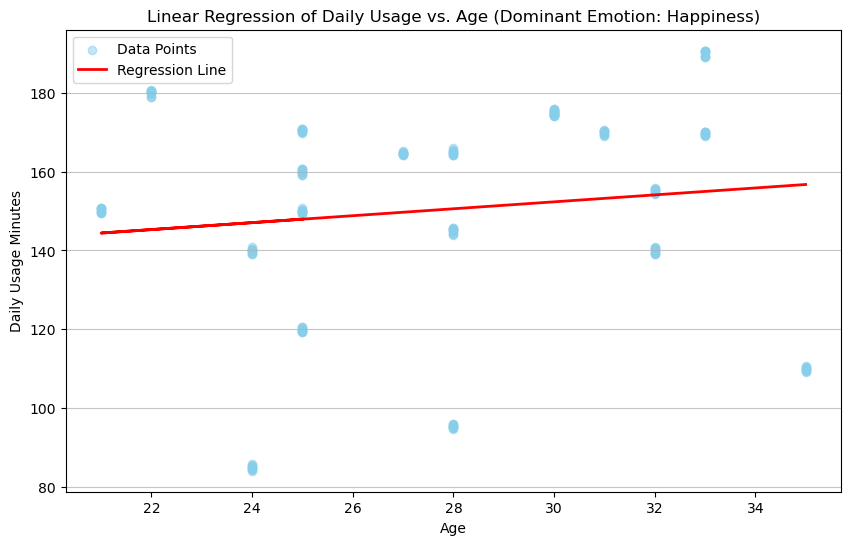

Anxiety
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.004
Method:                  Least Squares   F-statistic:                    0.2568
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):              0.613
Time:                         22:21:56   Log-Likelihood:                -854.66
No. Observations:                  170   AIC:                             1713.
Df Residuals:                      168   BIC:                             1720.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.7580     25.479  

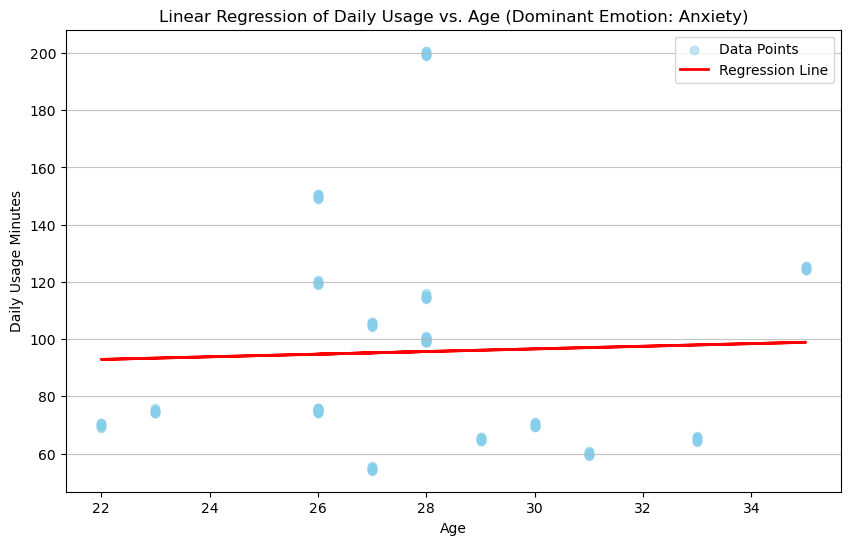

Boredom
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.006
Method:                  Least Squares   F-statistic:                    0.1061
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):              0.745
Time:                         22:21:56   Log-Likelihood:                -547.96
No. Observations:                  140   AIC:                             1100.
Df Residuals:                      138   BIC:                             1106.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.1462      8.602  

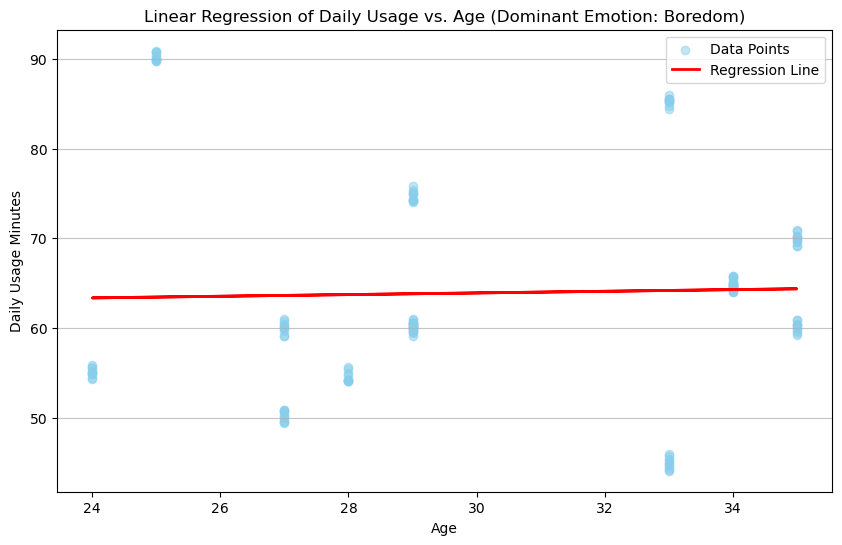

Sadness
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.017
Model:                             OLS   Adj. R-squared:                  0.011
Method:                  Least Squares   F-statistic:                     2.737
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):              0.100
Time:                         22:21:57   Log-Likelihood:                -759.01
No. Observations:                  160   AIC:                             1522.
Df Residuals:                      158   BIC:                             1528.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.5465     15.747  

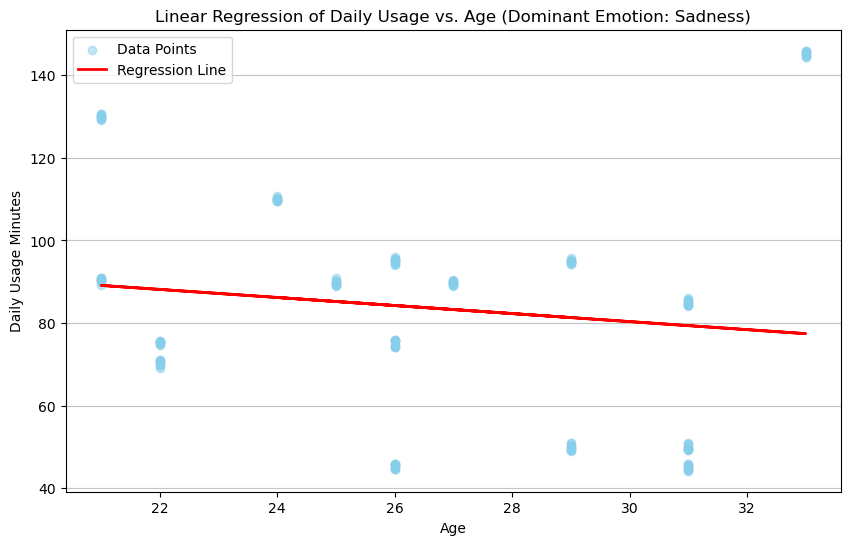

In [589]:
# Plot and run regressions for each emotion. To start we have daily usage vs age for each emotion across all data.

# age versus daily usage does not seem to have a correlation in most cases. Anger has a bit of a stronger curve.

emotions = ['Anger', 'Neutral', 'Happiness', 'Anxiety', 'Boredom', 'Sadness']
n = 0

def jitter(values, amount=1):
    return values + np.random.uniform(-amount, amount, len(values))

for emotion in emotions:
    n += 1
    emotion_df = social_df[social_df['Dominant_Emotion'] == emotion]
    
    # Linear Regression using sklearn
    X = emotion_df['Age'].values.reshape(-1, 1) 
    y = emotion_df['Daily_Usage_Minutes']
    model = LinearRegression()
    print(emotion)
    model.fit(X, y)
    
    # Regression Summary using statsmodels for more detail
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())
    
    # Predictions for plotting
    y_pred = model.predict(X)
    
    # Visualization using matplotlib
    plt.figure(num=n, figsize=(10, 6))
    plt.scatter(emotion_df['Age'], jitter(emotion_df['Daily_Usage_Minutes']), color='skyblue', label='Data Points', alpha=0.5)
    plt.plot(emotion_df['Age'], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f'Linear Regression of Daily Usage vs. Age (Dominant Emotion: {emotion})')
    plt.xlabel('Age')
    plt.ylabel('Daily Usage Minutes')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Anger
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.613
Model:                             OLS   Adj. R-squared:                  0.610
Method:                  Least Squares   F-statistic:                     202.7
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):           3.72e-28
Time:                         22:21:57   Log-Likelihood:                -477.53
No. Observations:                  130   AIC:                             959.1
Df Residuals:                      128   BIC:                             964.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.9585      2.668    

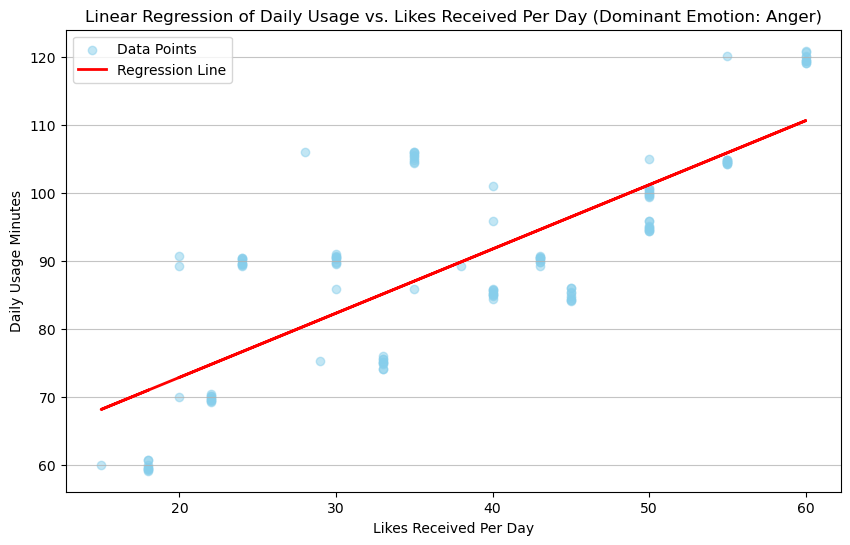

Neutral
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.707
Model:                             OLS   Adj. R-squared:                  0.705
Method:                  Least Squares   F-statistic:                     477.2
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):           1.21e-54
Time:                         22:21:57   Log-Likelihood:                -792.78
No. Observations:                  200   AIC:                             1590.
Df Residuals:                      198   BIC:                             1596.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3131      1.778  

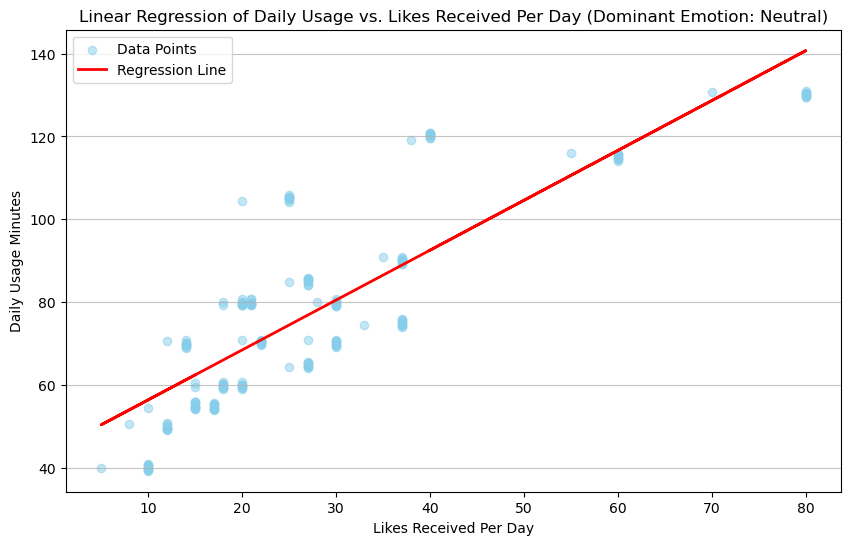

Happiness
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.832
Model:                             OLS   Adj. R-squared:                  0.831
Method:                  Least Squares   F-statistic:                     981.5
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):           1.16e-78
Time:                         22:21:57   Log-Likelihood:                -770.59
No. Observations:                  200   AIC:                             1545.
Df Residuals:                      198   BIC:                             1552.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9690      3.341

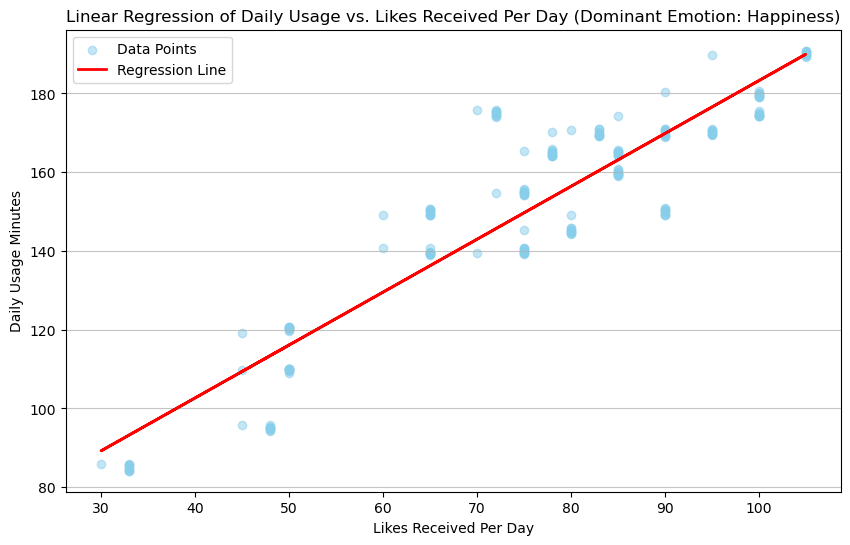

Anxiety
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.840
Model:                             OLS   Adj. R-squared:                  0.839
Method:                  Least Squares   F-statistic:                     881.6
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):           9.65e-69
Time:                         22:21:57   Log-Likelihood:                -699.05
No. Observations:                  170   AIC:                             1402.
Df Residuals:                      168   BIC:                             1408.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4258      2.237  

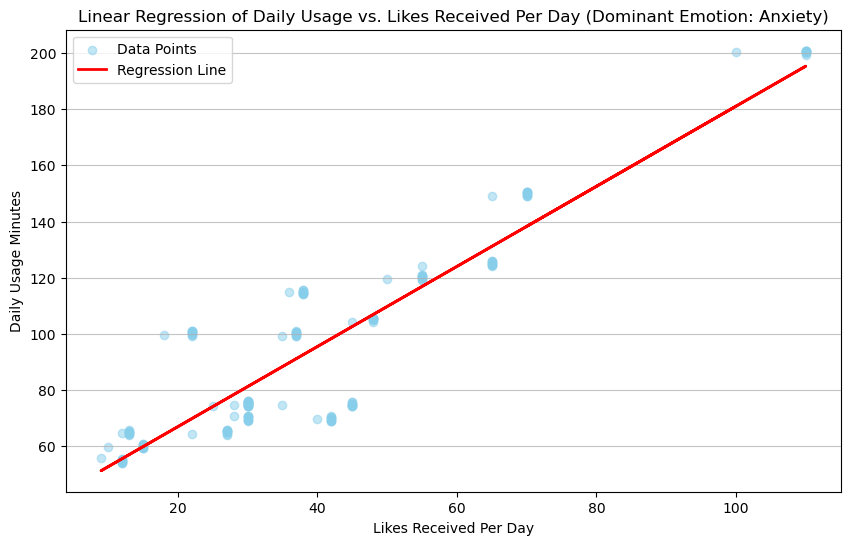

Boredom
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.667
Method:                  Least Squares   F-statistic:                     279.5
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):           5.54e-35
Time:                         22:21:57   Log-Likelihood:                -470.52
No. Observations:                  140   AIC:                             945.0
Df Residuals:                      138   BIC:                             950.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.1766      1.540  

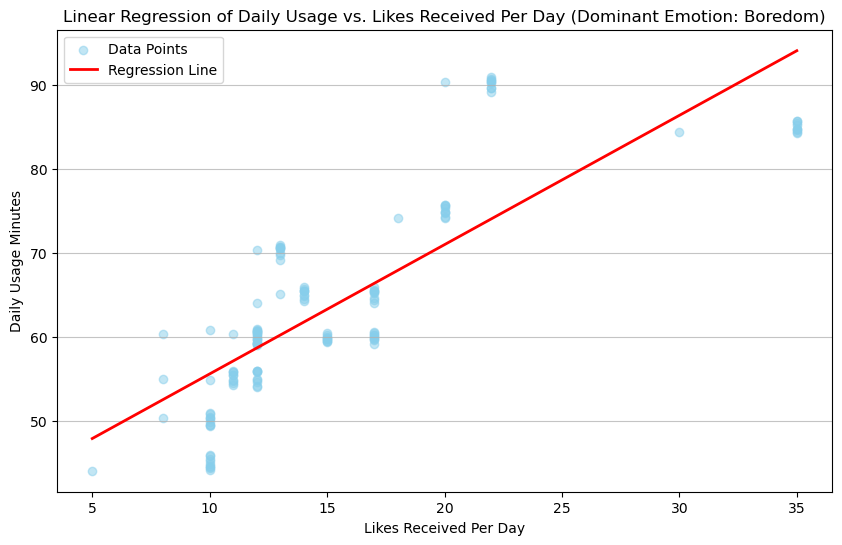

Sadness
                             OLS Regression Results                            
Dep. Variable:     Daily_Usage_Minutes   R-squared:                       0.705
Model:                             OLS   Adj. R-squared:                  0.703
Method:                  Least Squares   F-statistic:                     378.0
Date:                 Tue, 18 Jun 2024   Prob (F-statistic):           9.29e-44
Time:                         22:21:57   Log-Likelihood:                -662.66
No. Observations:                  160   AIC:                             1329.
Df Residuals:                      158   BIC:                             1335.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9020      2.249  

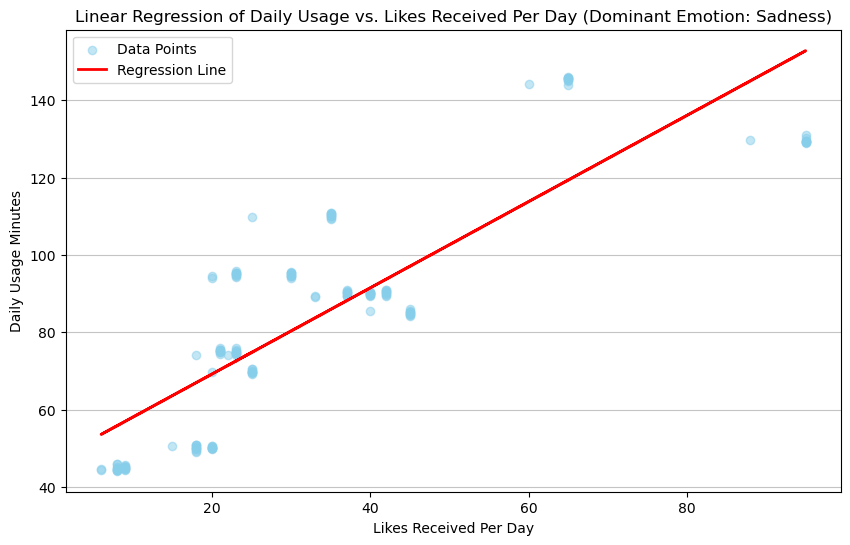

In [590]:
# for some emotions like happiness and anxiety we see a correlation for posts vs daily usage. boredom shows a very low post count but high minutes spent.

emotions = ['Anger', 'Neutral', 'Happiness', 'Anxiety', 'Boredom', 'Sadness']
n = 0

def jitter(values, amount=1):
    return values + np.random.uniform(-amount, amount, len(values))

for emotion in emotions:
    n += 1
    emotion_df = social_df[social_df['Dominant_Emotion'] == emotion]
    
    # Linear Regression using sklearn
    X = emotion_df['Likes_Received_Per_Day'].values.reshape(-1, 1) 
    y = emotion_df['Daily_Usage_Minutes']
    model = LinearRegression()
    print(emotion)
    model.fit(X, y)
    
    # Regression Summary using statsmodels for more detail
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())
    
    # Predictions for plotting
    y_pred = model.predict(X)
    
    # Visualization using matplotlib
    plt.figure(num=n, figsize=(10, 6))
    plt.scatter(emotion_df['Likes_Received_Per_Day'], jitter(emotion_df['Daily_Usage_Minutes']), color='skyblue', label='Data Points', alpha=0.5)
    plt.plot(emotion_df['Likes_Received_Per_Day'], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f'Linear Regression of Daily Usage vs. Likes Received Per Day (Dominant Emotion: {emotion})')
    plt.xlabel('Likes Received Per Day')
    plt.ylabel('Daily Usage Minutes')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Coefficients:
                         Anger   Anxiety    Boredom  Happiness    Neutral  \
Daily_Usage_Minutes -3.338789  5.124290 -29.938389  54.934839 -17.016255   
Overall_Engagement   0.746718  5.824868 -32.944444  48.378881 -15.887133   

                      Sadness  
Daily_Usage_Minutes -9.765696  
Overall_Engagement  -6.118890  


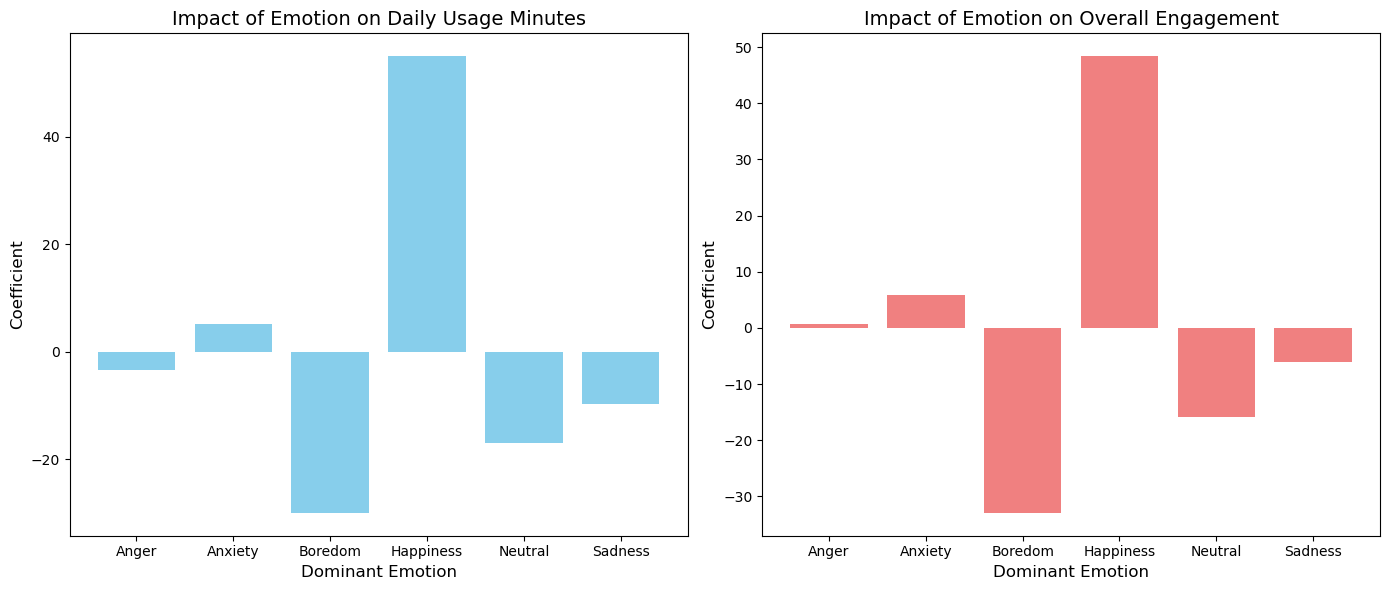

In [595]:
social_df['Overall_Engagement'] = social_df['Posts_Per_Day'] + social_df['Likes_Received_Per_Day'] + social_df['Messages_Sent_Per_Day']

X = social_df[['Dominant_Emotion']]  
y = social_df[['Daily_Usage_Minutes', 'Overall_Engagement']]

# Create a preprocessing pipeline for categorical encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Dominant_Emotion'])
    ]
)

# Create a pipeline that combines preprocessing and regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Get the coefficients (slopes) for each dependent variable
coefficients = pd.DataFrame(
    pipeline.named_steps['regressor'].coef_, 
    index=y.columns, 
    columns=pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['Dominant_Emotion'])
)
coefficients.columns = [col.replace("Dominant_Emotion_", "") for col in coefficients.columns]
print("Coefficients:\n", coefficients)

# Plotting with Matplotlib
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for Daily Usage Minutes
axes[0].bar(coefficients.columns, coefficients.loc['Daily_Usage_Minutes'], color='skyblue')
axes[0].set_xlabel('Dominant Emotion', fontsize=12)
axes[0].set_ylabel('Coefficient', fontsize=12)
axes[0].set_title('Impact of Emotion on Daily Usage Minutes', fontsize=14)

# Plot for Overall Engagement
axes[1].bar(coefficients.columns, coefficients.loc['Overall_Engagement'], color='lightcoral')
axes[1].set_xlabel('Dominant Emotion', fontsize=12)
axes[1].set_ylabel('Coefficient', fontsize=12)
axes[1].set_title('Impact of Emotion on Overall Engagement', fontsize=14)

plt.tight_layout()
plt.show()

"""
Impact on Daily Usage Minutes:
Happiness has the strongest positive impact, suggesting that users who predominantly feel happy tend to spend significantly more time on social media each day.
Boredom and Neutral emotions have a negative impact, indicating that users feeling bored or neutral tend to spend less time on social media.
Anger, Anxiety, and Sadness also show a slight negative association with daily usage minutes.
Impact on Overall Engagement:
Happiness again has the most substantial positive impact, suggesting that happy users engage more with content (posting, liking, messaging).
Boredom has the strongest negative impact, indicating that bored users engage less.
Anxiety has a positive impact, suggesting that anxious users might engage more, possibly seeking connection or distraction.
Anger, Neutral, and Sadness show a negative association with overall engagement.
"""

In [ ]:
# attempting GLM analysis. As expected, anyone who posts and sends messages are associated with increased time on social media
# this makes sense!

x_values = social_df[['Posts_Per_Day','Messages_Sent_Per_Day']]
y = social_df['Daily_Usage_Minutes']

# Add constant for intercept
x_values = sm.add_constant(x_values) 

# Fit the GLM
model = sm.GLM(y, x_values, family=sm.families.Gaussian())
results = model.fit()

print('Normal GLM')
print(results.summary())

gamma_model = sm.GLM(y, x_values, family=sm.families.Gamma(link=sm.families.links.Log()))  
gamma_results = gamma_model.fit()

print('Gamma GLM')
print(gamma_results.summary())

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# decided to give it a try with all the data.
tree_df = social_df

# Convert categorical variable to numerical (using label encoding for simplicity)
tree_df['Dominant_Emotion'] = tree_df['Dominant_Emotion'].astype('category').cat.codes

# Split data into features (Age) and target (Dominant_Emotion)
X = tree_df[['Age']]
y = tree_df['Dominant_Emotion']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create andexpand_more train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth for complexity
clf.fit(X_train, y_train)

# Get the original class names
class_names = tree_df['Dominant_Emotion'].astype('category').cat.categories

# Convert class names to strings
class_names_str = [str(name) for name in class_names] 

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=["Age"], class_names=class_names_str, rounded=True)  # Use class_names_str
plt.title("Decision Tree for Dominant Emotion by Age")
plt.show()

## Additional Analysis - Separate from above

In [ ]:
x = social_df['Age']
y = social_df['Daily_Usage_Minutes']

# Calculate regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the scatterplot
plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Daily Usage (Minutes)")
plt.title("Relationship Between Age and Daily Usage")
# Create line values using the original x values and the regression equation
line = slope * x + intercept
# Plot the regression line
plt.plot(x, line, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.show()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
social_df.columns

In [ ]:
fit2 = smf.glm(formula = 'Daily_Usage_Minutes ~ C(Platform)', data = social_df,
               family = sm.families.Gamma()).fit()
print(fit2.summary())

In [ ]:
social_df = pd.get_dummies(social_df, columns=['Platform'], prefix='Platform')
print(social_df.head())

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Encode the 'Dominant_Emotion' variable
social_df['Dominant_Emotion'] = social_df['Dominant_Emotion'].astype('category').cat.codes

In [ ]:
# Define the formula for the regression
formula = 'Dominant_Emotion ~ Daily_Usage_Minutes + Platform_Instagram'

# Fit the multinomial logistic regression model
model = smf.mnlogit(formula, data=social_df)
result = model.fit()

# Print the summary
print(result.summary())

In [ ]:
# Define the formula for the regression
formula = 'Dominant_Emotion ~ Daily_Usage_Minutes + Age + Likes_Received_Per_Day'

# Fit the multinomial logistic regression model
model = smf.mnlogit(formula, data=social_df)
result = model.fit()

# Print the summary
print(result.summary())